<h1><center>Assignment1 - ML <br>
            Narendra Parigi <br>
            12089265 <br>
</center></h1>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn import metrics

pd.options.mode.chained_assignment = None

%matplotlib inline
plt.rcParams['figure.dpi'] = 300

### Problem 1: Data preparation 

##### 1.1 Reading the both csv files

In [12]:
df_redwines = pd.read_csv('winequality-red.csv', sep=';')
df_whitewines = pd.read_csv('winequality-white.csv', sep=';')
print('The size of the redwines dataframe is {}, whitewines dataframe is {} and total size is {}'
      .format(df_redwines.shape[0], df_whitewines.shape[0], df_redwines.shape[0]+df_whitewines.shape[0]))

The size of the redwines dataframe is 1599, whitewines dataframe is 4898 and total size is 6497


##### 1.2 Combining two dataframes

In [13]:
df_combined = df_redwines.append(df_whitewines)
df_combined.shape

(6497, 12)

##### 1.3 Create X matrix with all feature columns except target variable
&
##### 1.4 And target variable Y

In [14]:
X_cols = [col for col in df_combined.columns if col != 'quality']
y_col = ['quality']
X = df_combined[X_cols]
y = df_combined[y_col]

##### 1.5 Normalize X feature set 
&
##### 1.6 Create train, test split

In [15]:
# the entire X dataset is normalized as it was asked
X_norm = normalize(X, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((5197, 11), (1300, 11), (5197, 1), (1300, 1))

### Problem 2: Linear regression

##### 2.1 Linear regression model on training dataset, with 10-fold cross-validation

In [16]:
lr = linear_model.LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=10)
print('Average performance of linear regression on the training set is {:.3f}'.format(np.mean(scores)))

Average performance of linear regression on the training set is 0.187


##### 2.2 Linear regression model on training dataset, performance of model on training dataset and test dataset

In [17]:
lr = linear_model.LinearRegression()
lr_model = lr.fit(X_train, y_train)
print('The performance of linear regression on the training dataset is {:.3f}'.format(lr_model.score(X_train, y_train)))
print('The performance of linear regression on the training dataset is {:.3f}'.format(lr_model.score(X_test, y_test)))
print('The following are the coefficients of linear model \n {}'.format(lr_model.coef_))
print('The following is intercept of linear model \n {}'.format(lr_model.intercept_))

The performance of linear regression on the training dataset is 0.193
The performance of linear regression on the training dataset is 0.152
The following are the coefficients of linear model 
 [[   2.41071934  -50.15735224  -21.16221832    0.94670695  -33.81895257
     2.05315649    2.89179707 -146.99243803   -8.92388985   31.73383289
    17.14142109]]
The following is intercept of linear model 
 [2.37929933]


### Problem 3: Ridge and Lasso regression

##### 3.1 Ridge regression on the training set with 10-fold cross-validation, and with grid search on the α parameter in the range (−6, +3) evenly spread in logspace.

In [18]:
ridge = linear_model.Ridge()
param_grid = {'alpha':np.logspace(-6,3,10)}
grid_ridge = GridSearchCV(ridge, param_grid, cv=10,return_train_score=True)
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

##### 3.2 Do the same for Lasso regression. Manually set max_iter if you get warning messages about convergence.

In [19]:
lasso = linear_model.Lasso(max_iter=100000)
param_grid = {'alpha':np.logspace(-6,3,10)}
grid_lasso = GridSearchCV(lasso, param_grid, cv=10,return_train_score=True)
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

##### 3.3 Report your results for both Ridge and Lasso.

In [20]:
print('The best performance of ridge regression on the training dataset is {:.3f}'.format(grid_ridge.best_score_))
print('The best performance of ridge regression on the test dataset is {:.3f}'.format(grid_ridge.best_estimator_.score(X_test, y_test)))
print('The following is the best param of ridge model {}'.format(grid_ridge.best_params_))
print('The following are the coefficients of ridge model \n {}'.format(grid_ridge.best_estimator_.coef_))
print('The following is intercept of ridge model {}'.format(grid_ridge.best_estimator_.intercept_))

The best performance of ridge regression on the training dataset is 0.188
The best performance of ridge regression on the test dataset is 0.152
The following is the best param of ridge model {'alpha': 0.0001}
The following are the coefficients of ridge model 
 [[   2.19301215  -49.75279185  -20.8602796     0.92488694  -33.61941889
     2.05353749    2.87022715 -135.43673564  -11.6868767    31.82729633
    17.05520239]]
The following is intercept of ridge model [2.39705766]


In [21]:
print('The best performance of lasso regression on the training dataset is {:.3f}'.format(grid_lasso.best_score_))
print('The best performance of lasso regression on the test dataset is {:.3f}'.format(grid_lasso.best_estimator_.score(X_test, y_test)))
print('The following is the best param of lasso model {}'.format(grid_lasso.best_params_))
print('The following are the coefficients of lasso model \n {}'.format(grid_lasso.best_estimator_.coef_))
print('The following is intercept of lasso model {}'.format(grid_lasso.best_estimator_.intercept_))

The best performance of lasso regression on the training dataset is 0.187
The best performance of lasso regression on the test dataset is 0.152
The following is the best param of lasso model {'alpha': 1e-06}
The following are the coefficients of lasso model 
 [   2.33451944  -50.01611871  -20.80767011    0.93633061  -31.53711815
    2.05364653    2.88492794 -143.93459348   -9.59763      31.35485246
   17.11362712]
The following is intercept of lasso model [2.3851505]


### Problem 4: Visualize performance

##### 4.1 Create a plot which shows the average coefficient of determination values R2 for both the train and the test set for both regression models. In other words, we would like to see a plot with 2 × 2 = 4 lines; do not forget to provide a legend.

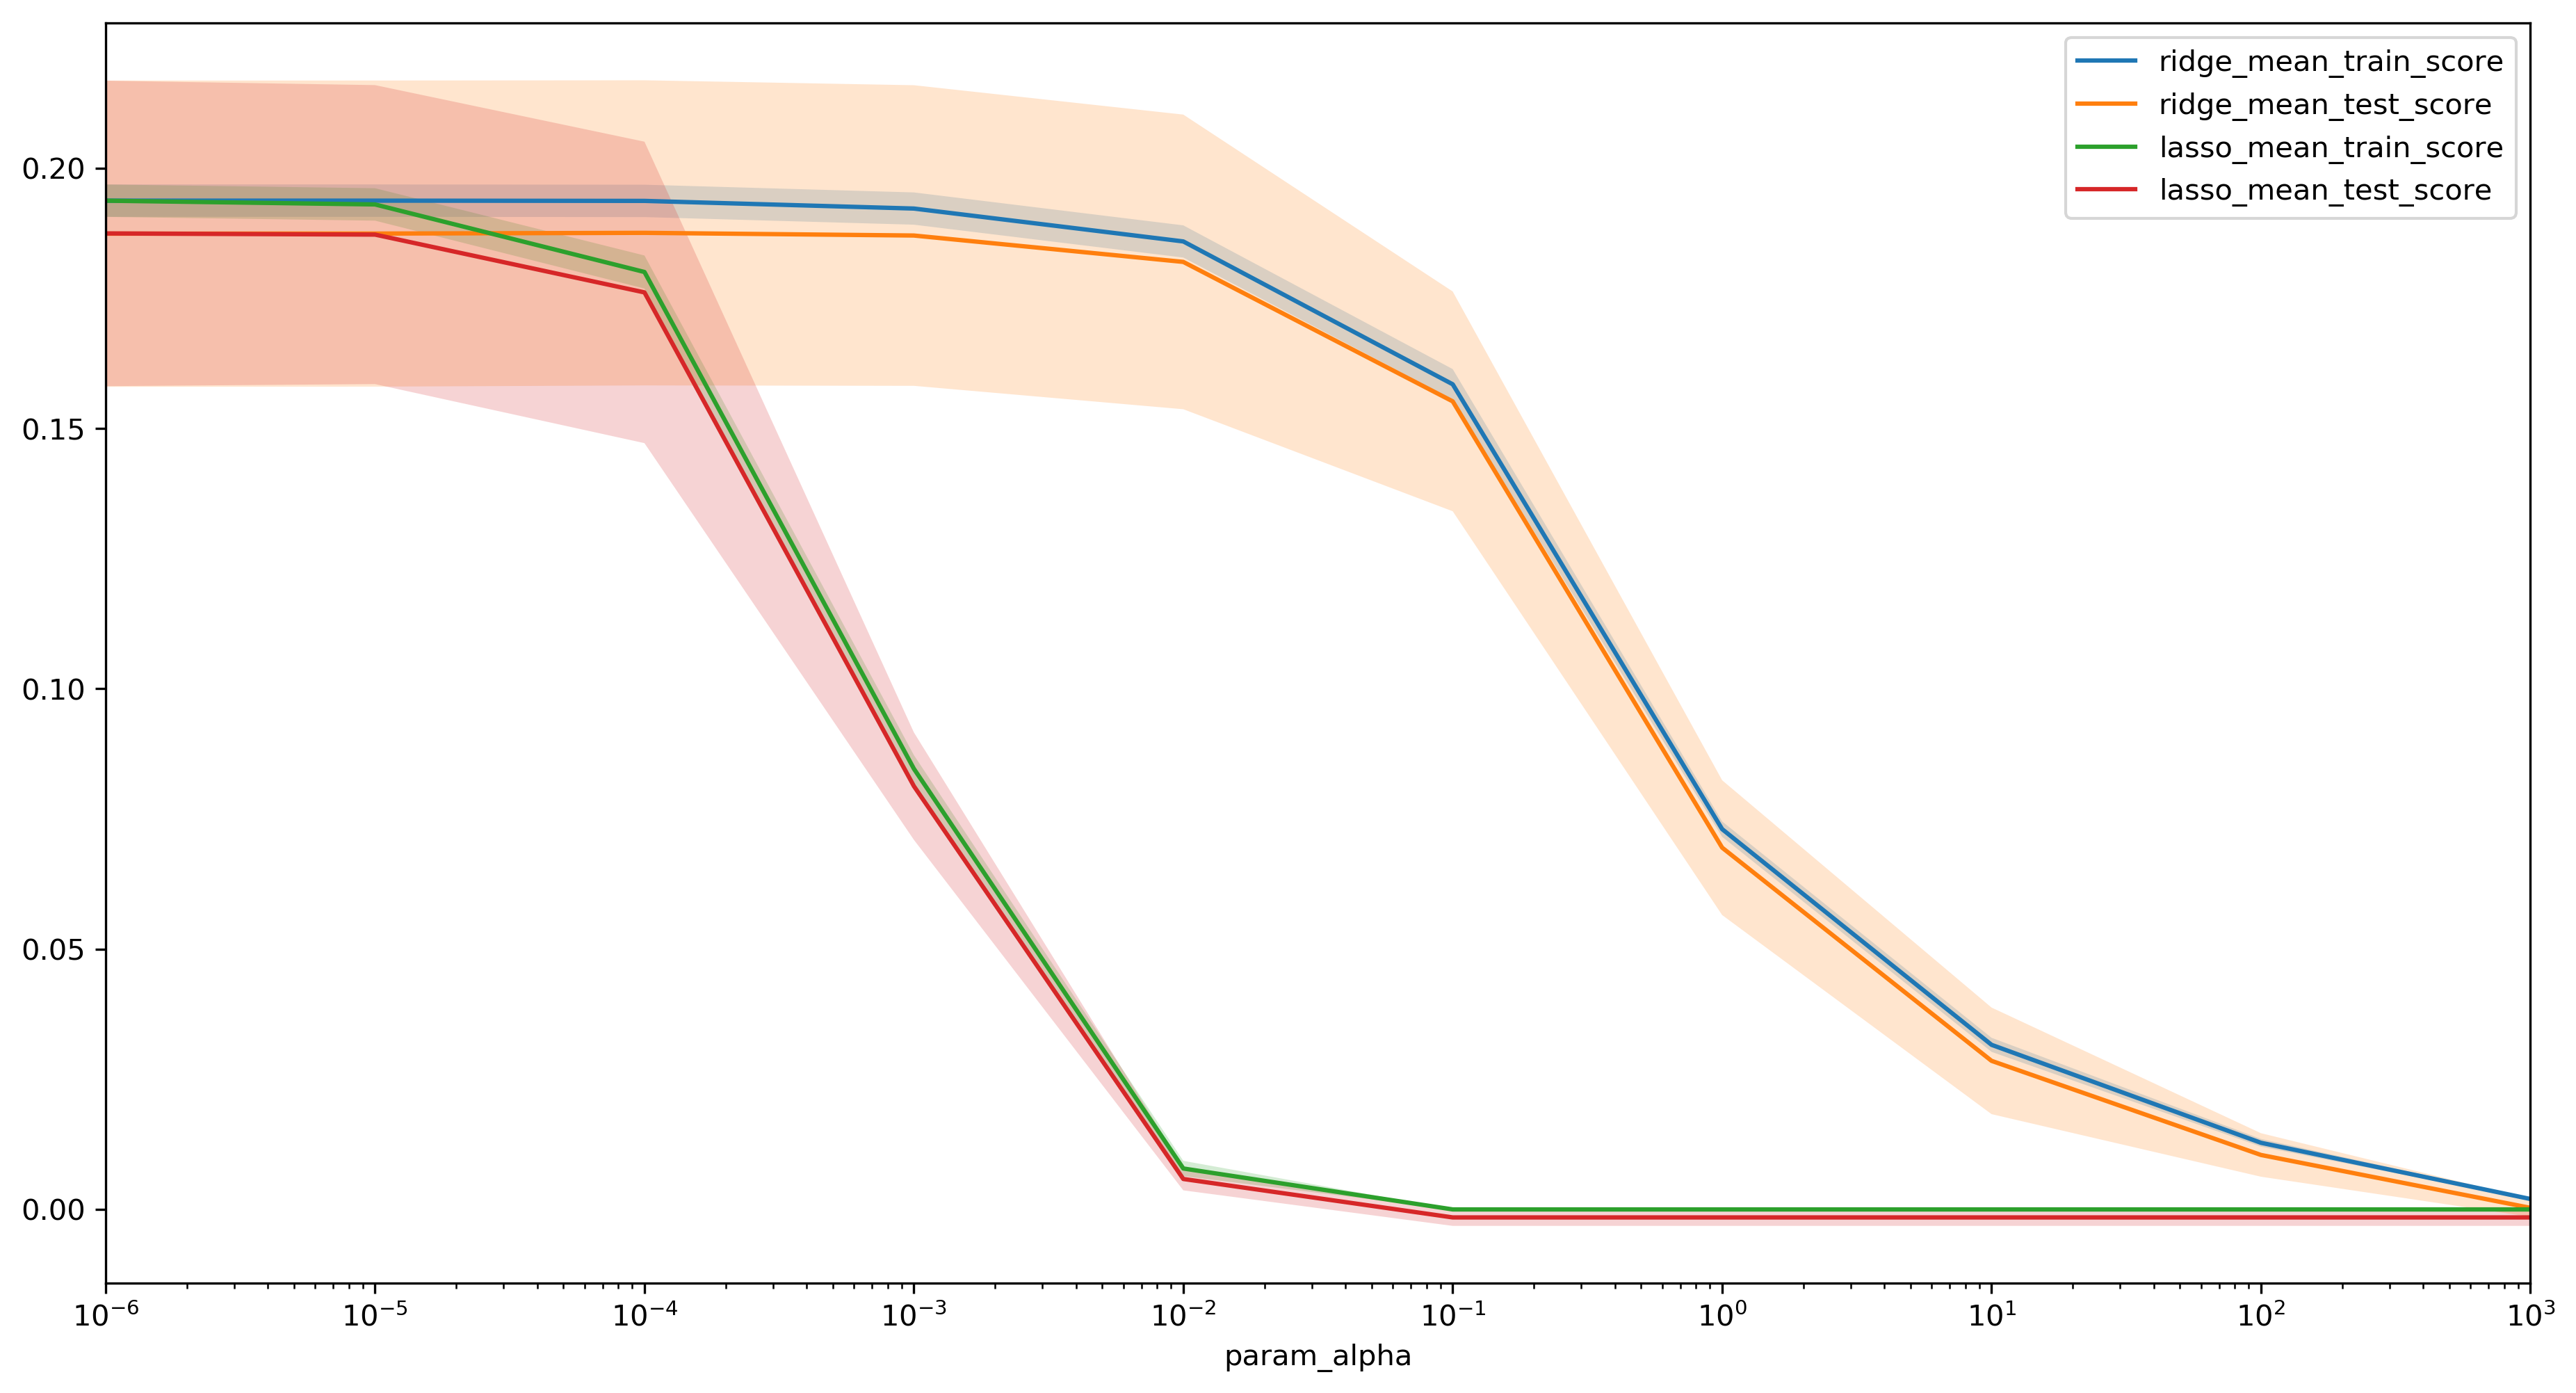

In [22]:
import pandas as pd
results_ridge = pd.DataFrame(grid_ridge.cv_results_)
ax = results_ridge.plot('param_alpha', 'mean_train_score', label='ridge_mean_train_score', figsize=(15,8))
results_ridge.plot('param_alpha', 'mean_test_score', ax=ax, label='ridge_mean_test_score')
ax.fill_between(results_ridge.param_alpha.astype(np.float),
                 results_ridge['mean_train_score'] + results_ridge['std_train_score'],
                 results_ridge['mean_train_score'] - results_ridge['std_train_score'], alpha=0.2)
ax.fill_between(results_ridge.param_alpha.astype(np.float),
                 results_ridge['mean_test_score'] + results_ridge['std_test_score'],
                 results_ridge['mean_test_score'] - results_ridge['std_test_score'], alpha=0.2)

results_lasso = pd.DataFrame(grid_lasso.cv_results_)
results_lasso.plot('param_alpha', 'mean_train_score', ax=ax, label='lasso_mean_train_score')
results_lasso.plot('param_alpha', 'mean_test_score', ax=ax, label='lasso_mean_test_score')
ax.fill_between(results_lasso.param_alpha.astype(np.float),
                 results_lasso['mean_train_score'] + results_lasso['std_train_score'],
                 results_lasso['mean_train_score'] - results_lasso['std_train_score'], alpha=0.2)
ax.fill_between(results_lasso.param_alpha.astype(np.float),
                 results_lasso['mean_test_score'] + results_lasso['std_test_score'],
                 results_lasso['mean_test_score'] - results_lasso['std_test_score'], alpha=0.2)

plt.legend(loc='best')
plt.xscale("log")

##### 4.2 What can we conclude from this visualization? Which model and α gives the best predictions?

- The performance of the model is gradually decreasing with increase in alpha value. (high vs low regularization)
- None of the models are performing best (relatively) on the dataset. 
- By comparing the scores, we can say ridge is performing better at alpha=0.0001 compare to lasso model.

##### 4.3 How many coefficients are set to zero in the best Ridge/Lasso model respectively?

In [23]:
print('The following are the coefficients of ridge model \n {}'.format(grid_ridge.best_estimator_.coef_))
print('The following is intercept of ridge model {}'.format(grid_ridge.best_estimator_.intercept_))

The following are the coefficients of ridge model 
 [[   2.19301215  -49.75279185  -20.8602796     0.92488694  -33.61941889
     2.05353749    2.87022715 -135.43673564  -11.6868767    31.82729633
    17.05520239]]
The following is intercept of ridge model [2.39705766]


In [24]:
print('The following are the coefficients of lasso model \n {}'.format(grid_lasso.best_estimator_.coef_))
print('The following is intercept of lasso model {}'.format(grid_lasso.best_estimator_.intercept_))

The following are the coefficients of lasso model 
 [   2.33451944  -50.01611871  -20.80767011    0.93633061  -31.53711815
    2.05364653    2.88492794 -143.93459348   -9.59763      31.35485246
   17.11362712]
The following is intercept of lasso model [2.3851505]


- Actually none of the variables are set to zero either in ridge/lasso model.
- The hyperparameter value is very close to zero in both ridge and lasso model, leading to have these models to have similar results as OLS (ordinary least squares) regression.

#### Problem 5: Visualize the coefficients

##### Linear Regression

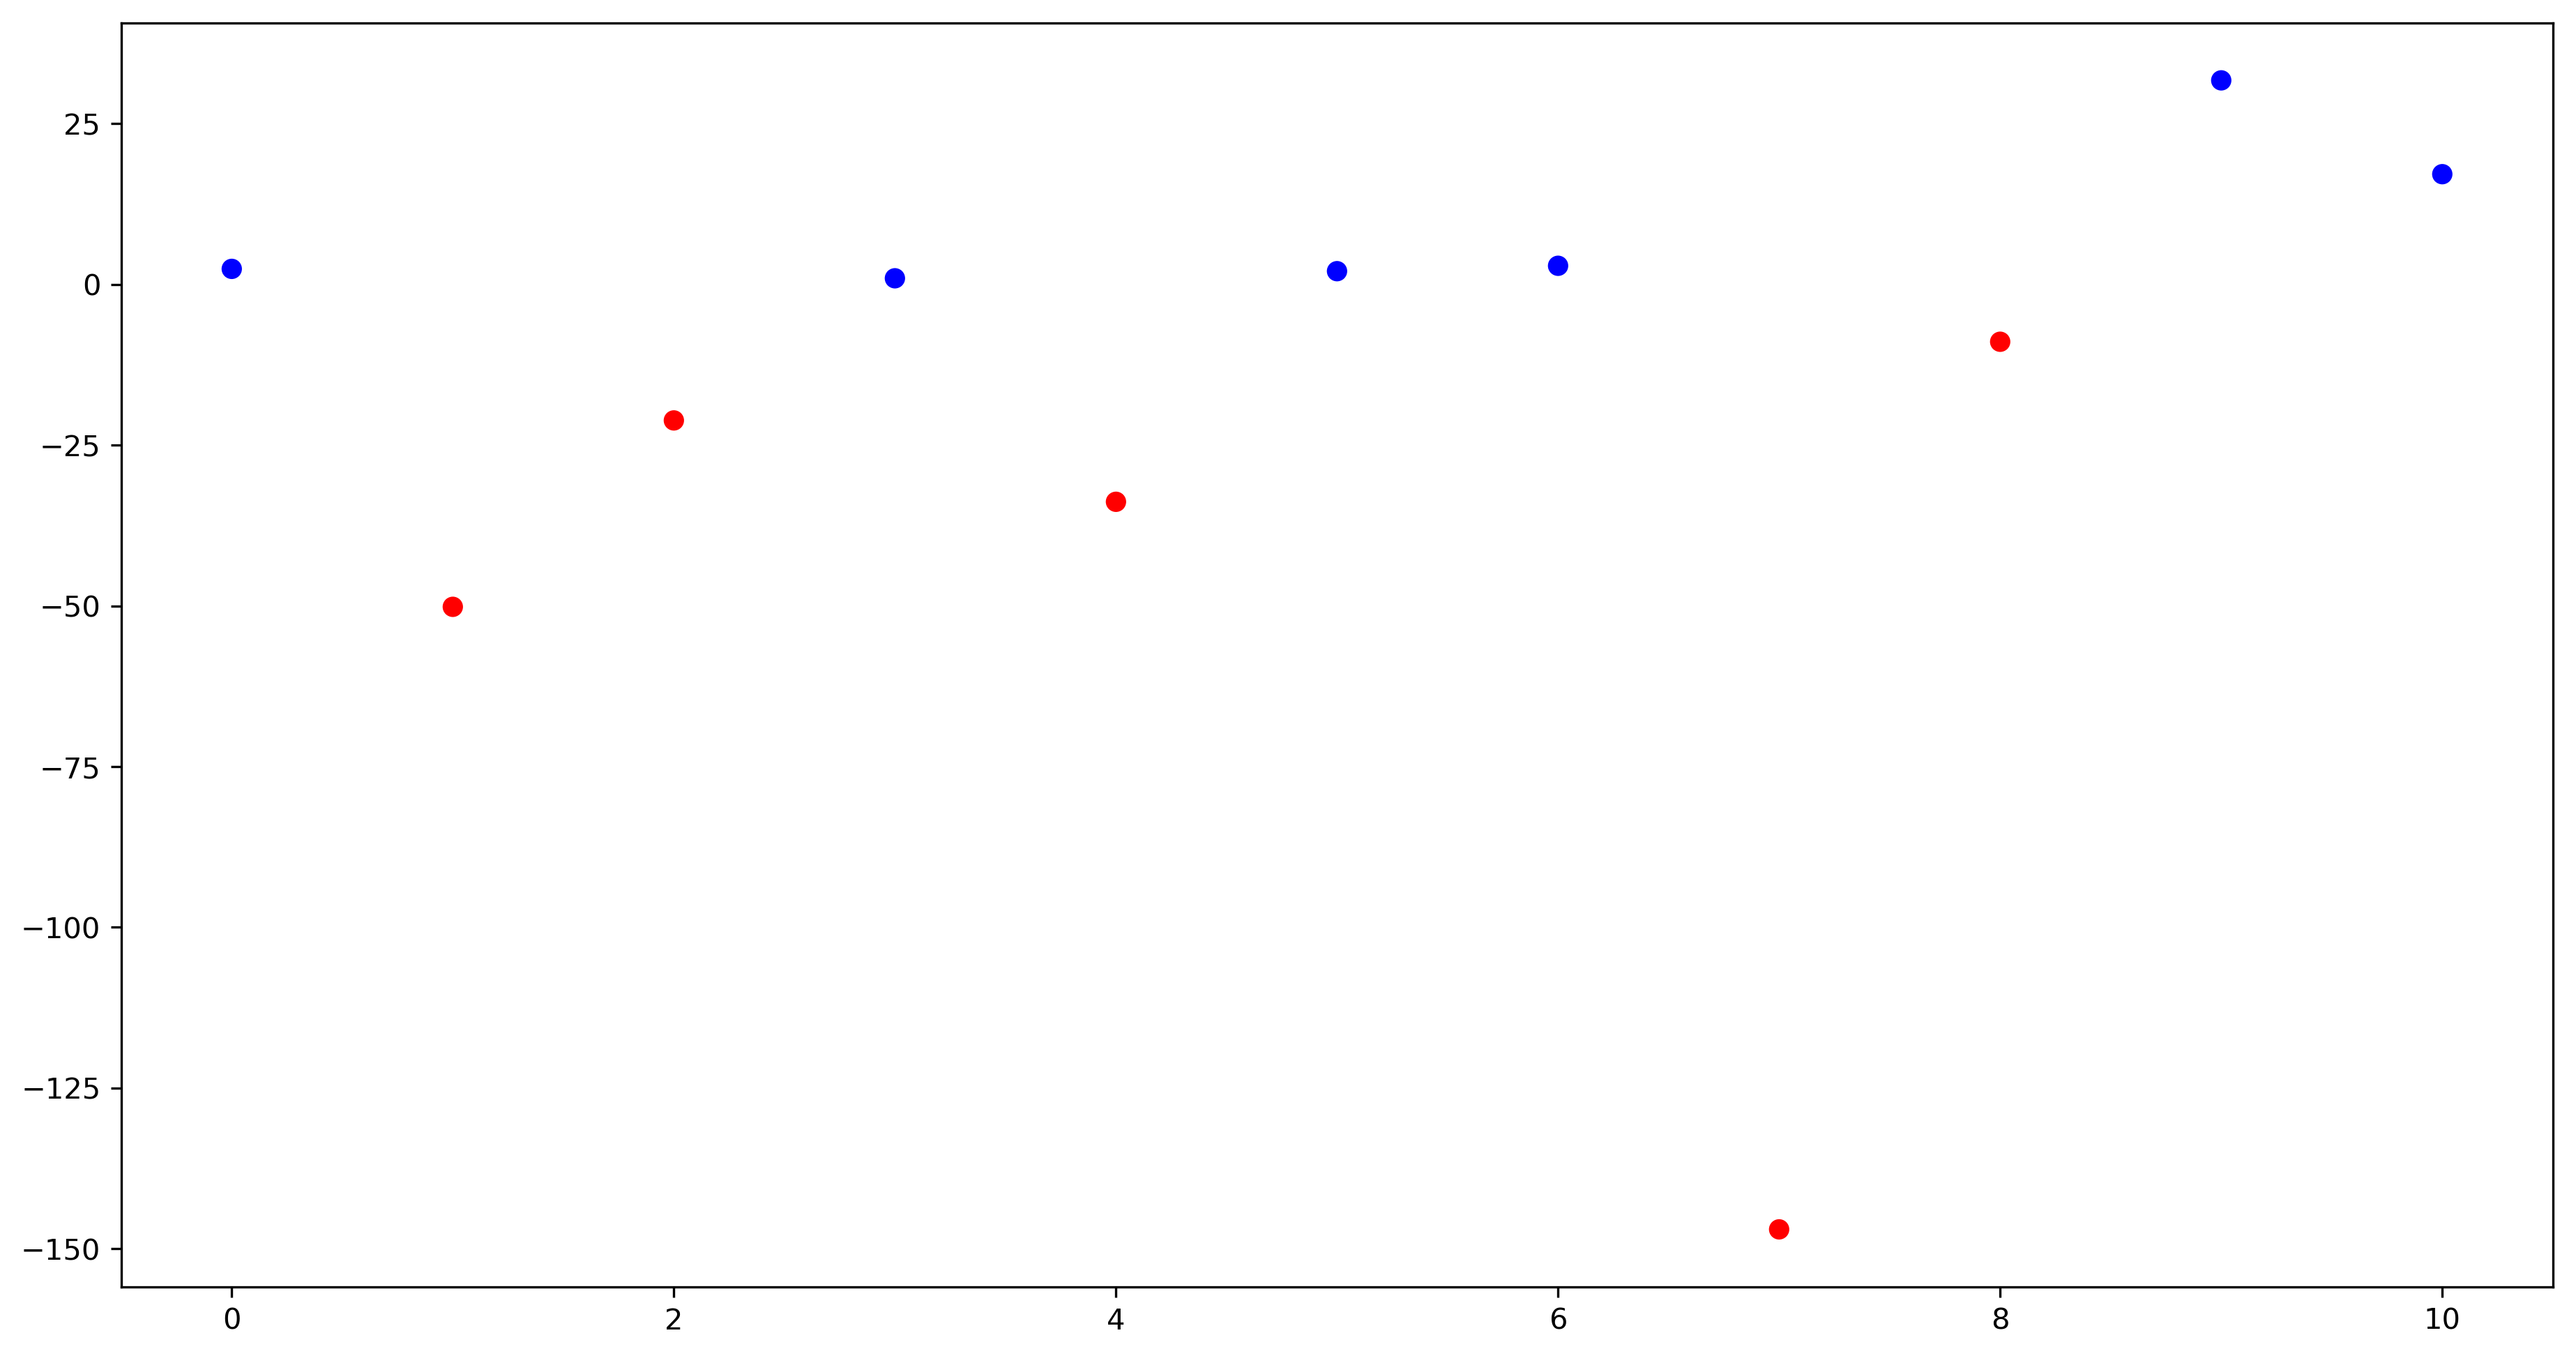

In [25]:
plt.figure(figsize=(15, 8))
plt.scatter(range(X_norm.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap='bwr_r')

##### 5.1 Ridge

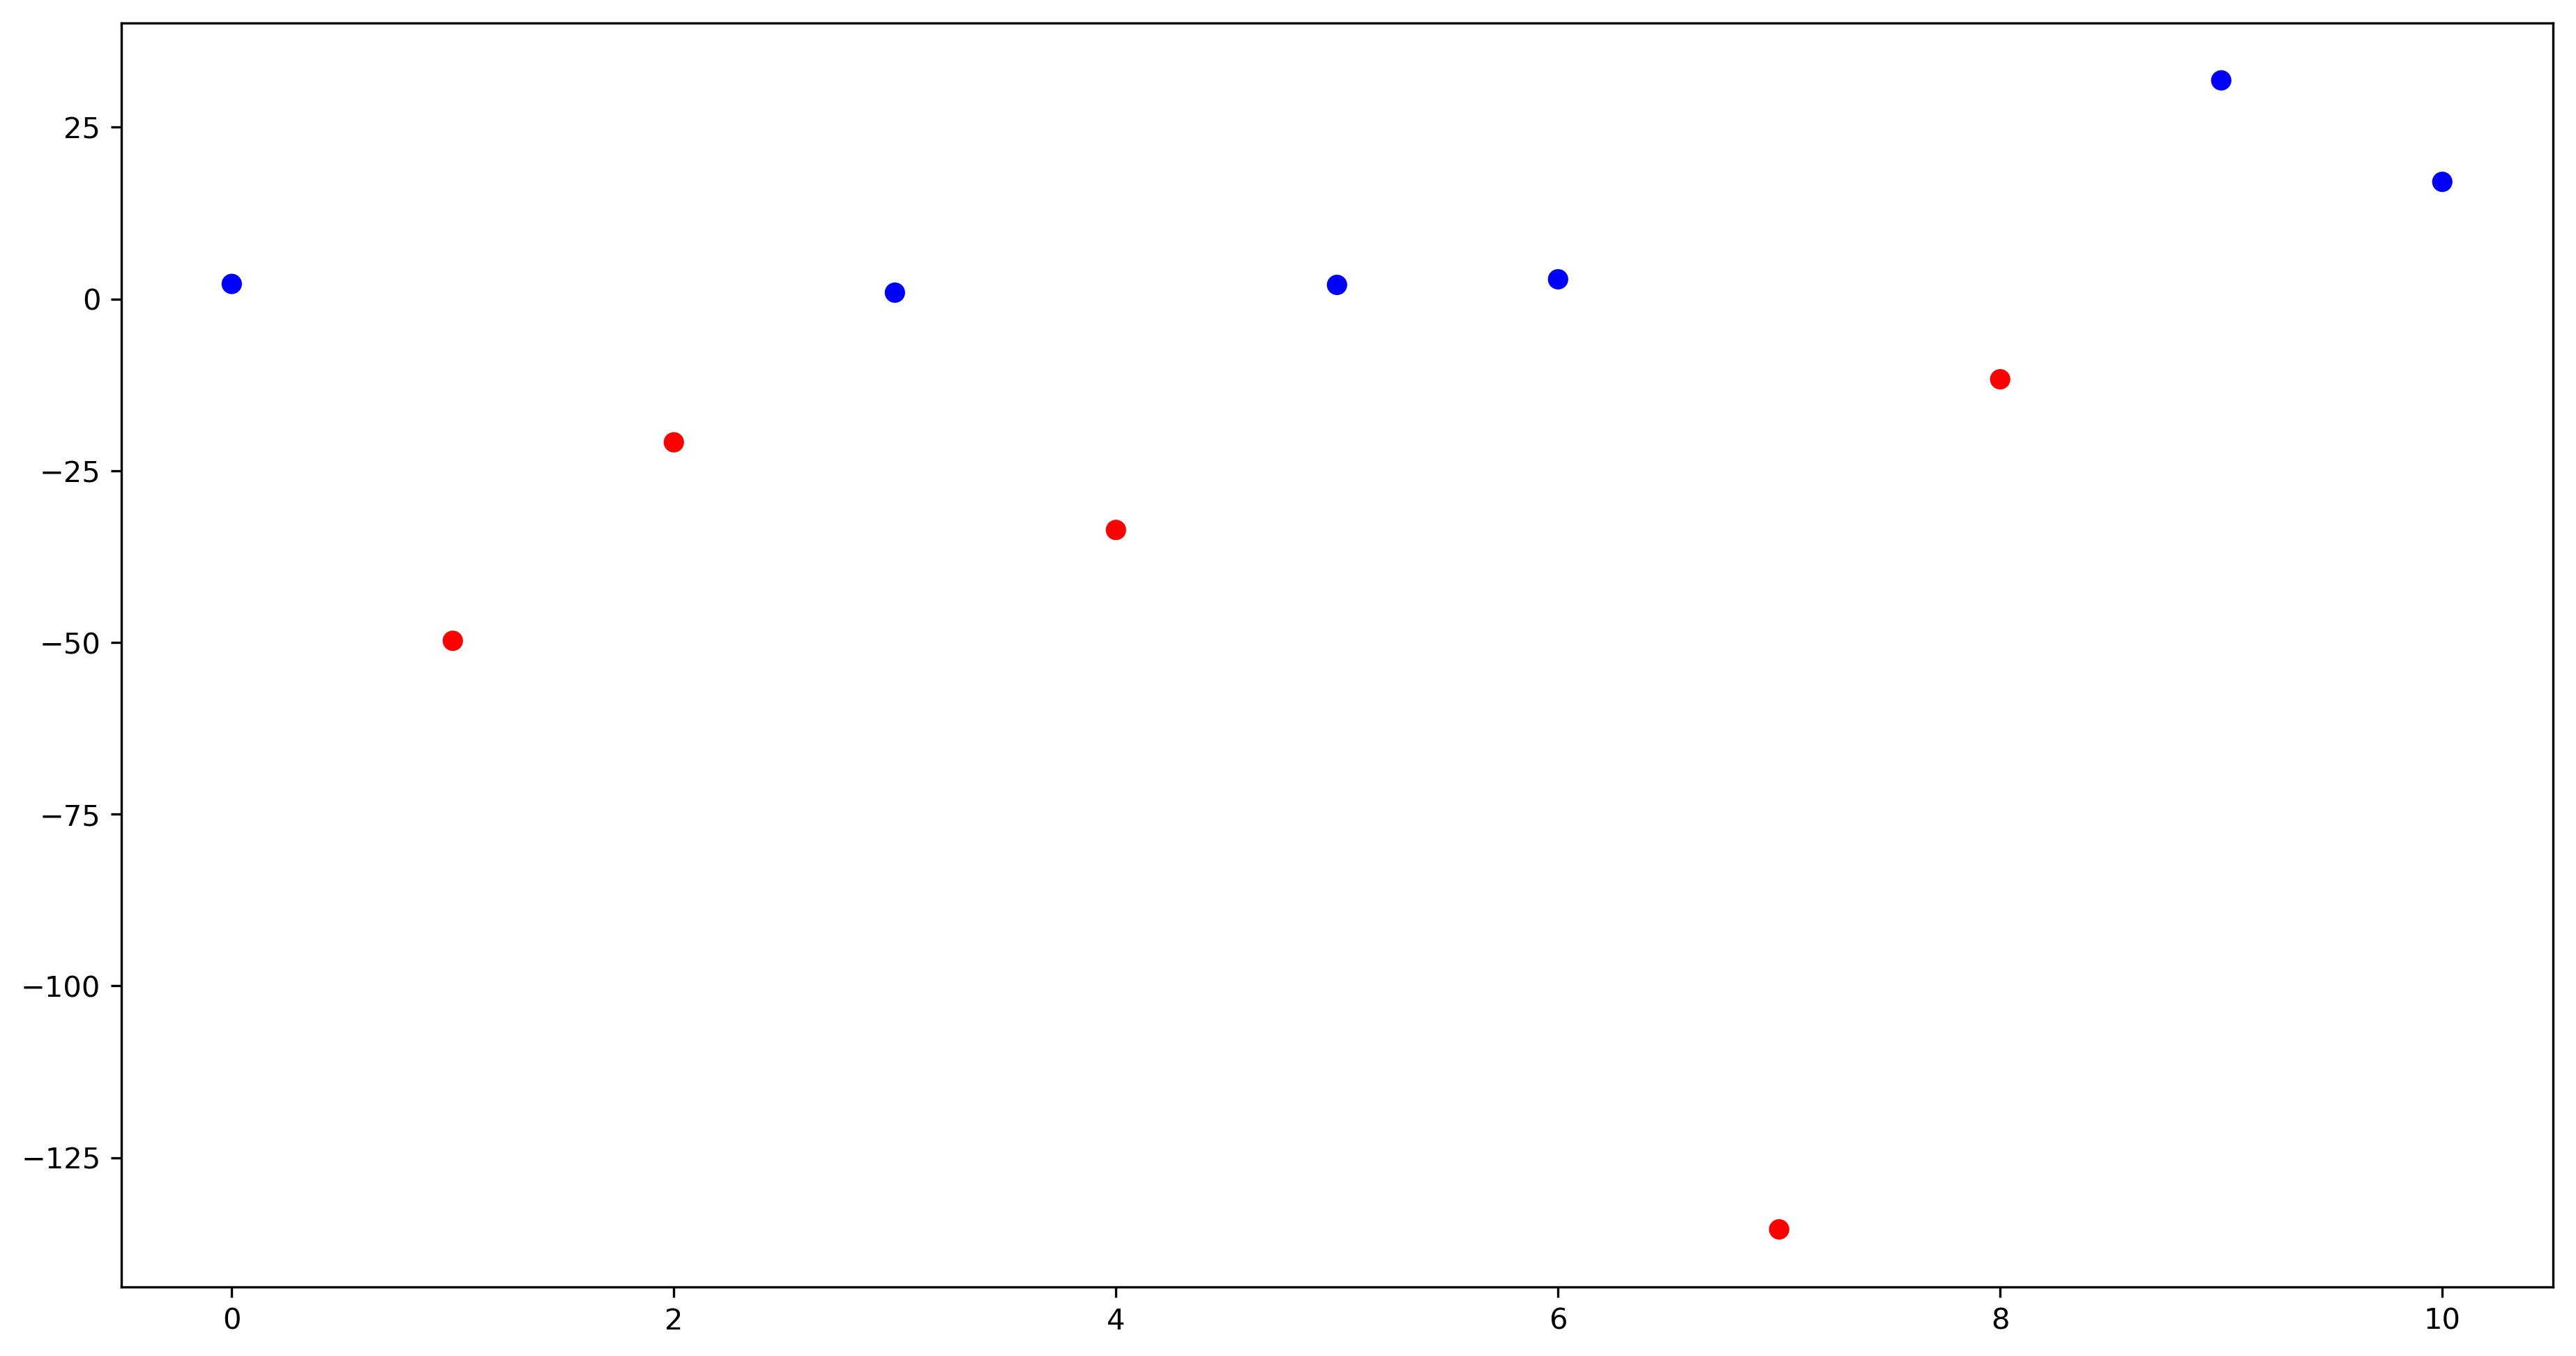

In [26]:
ridge = grid_ridge.best_estimator_
plt.figure(figsize=(15, 8))
plt.scatter(range(X_norm.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap='bwr_r')

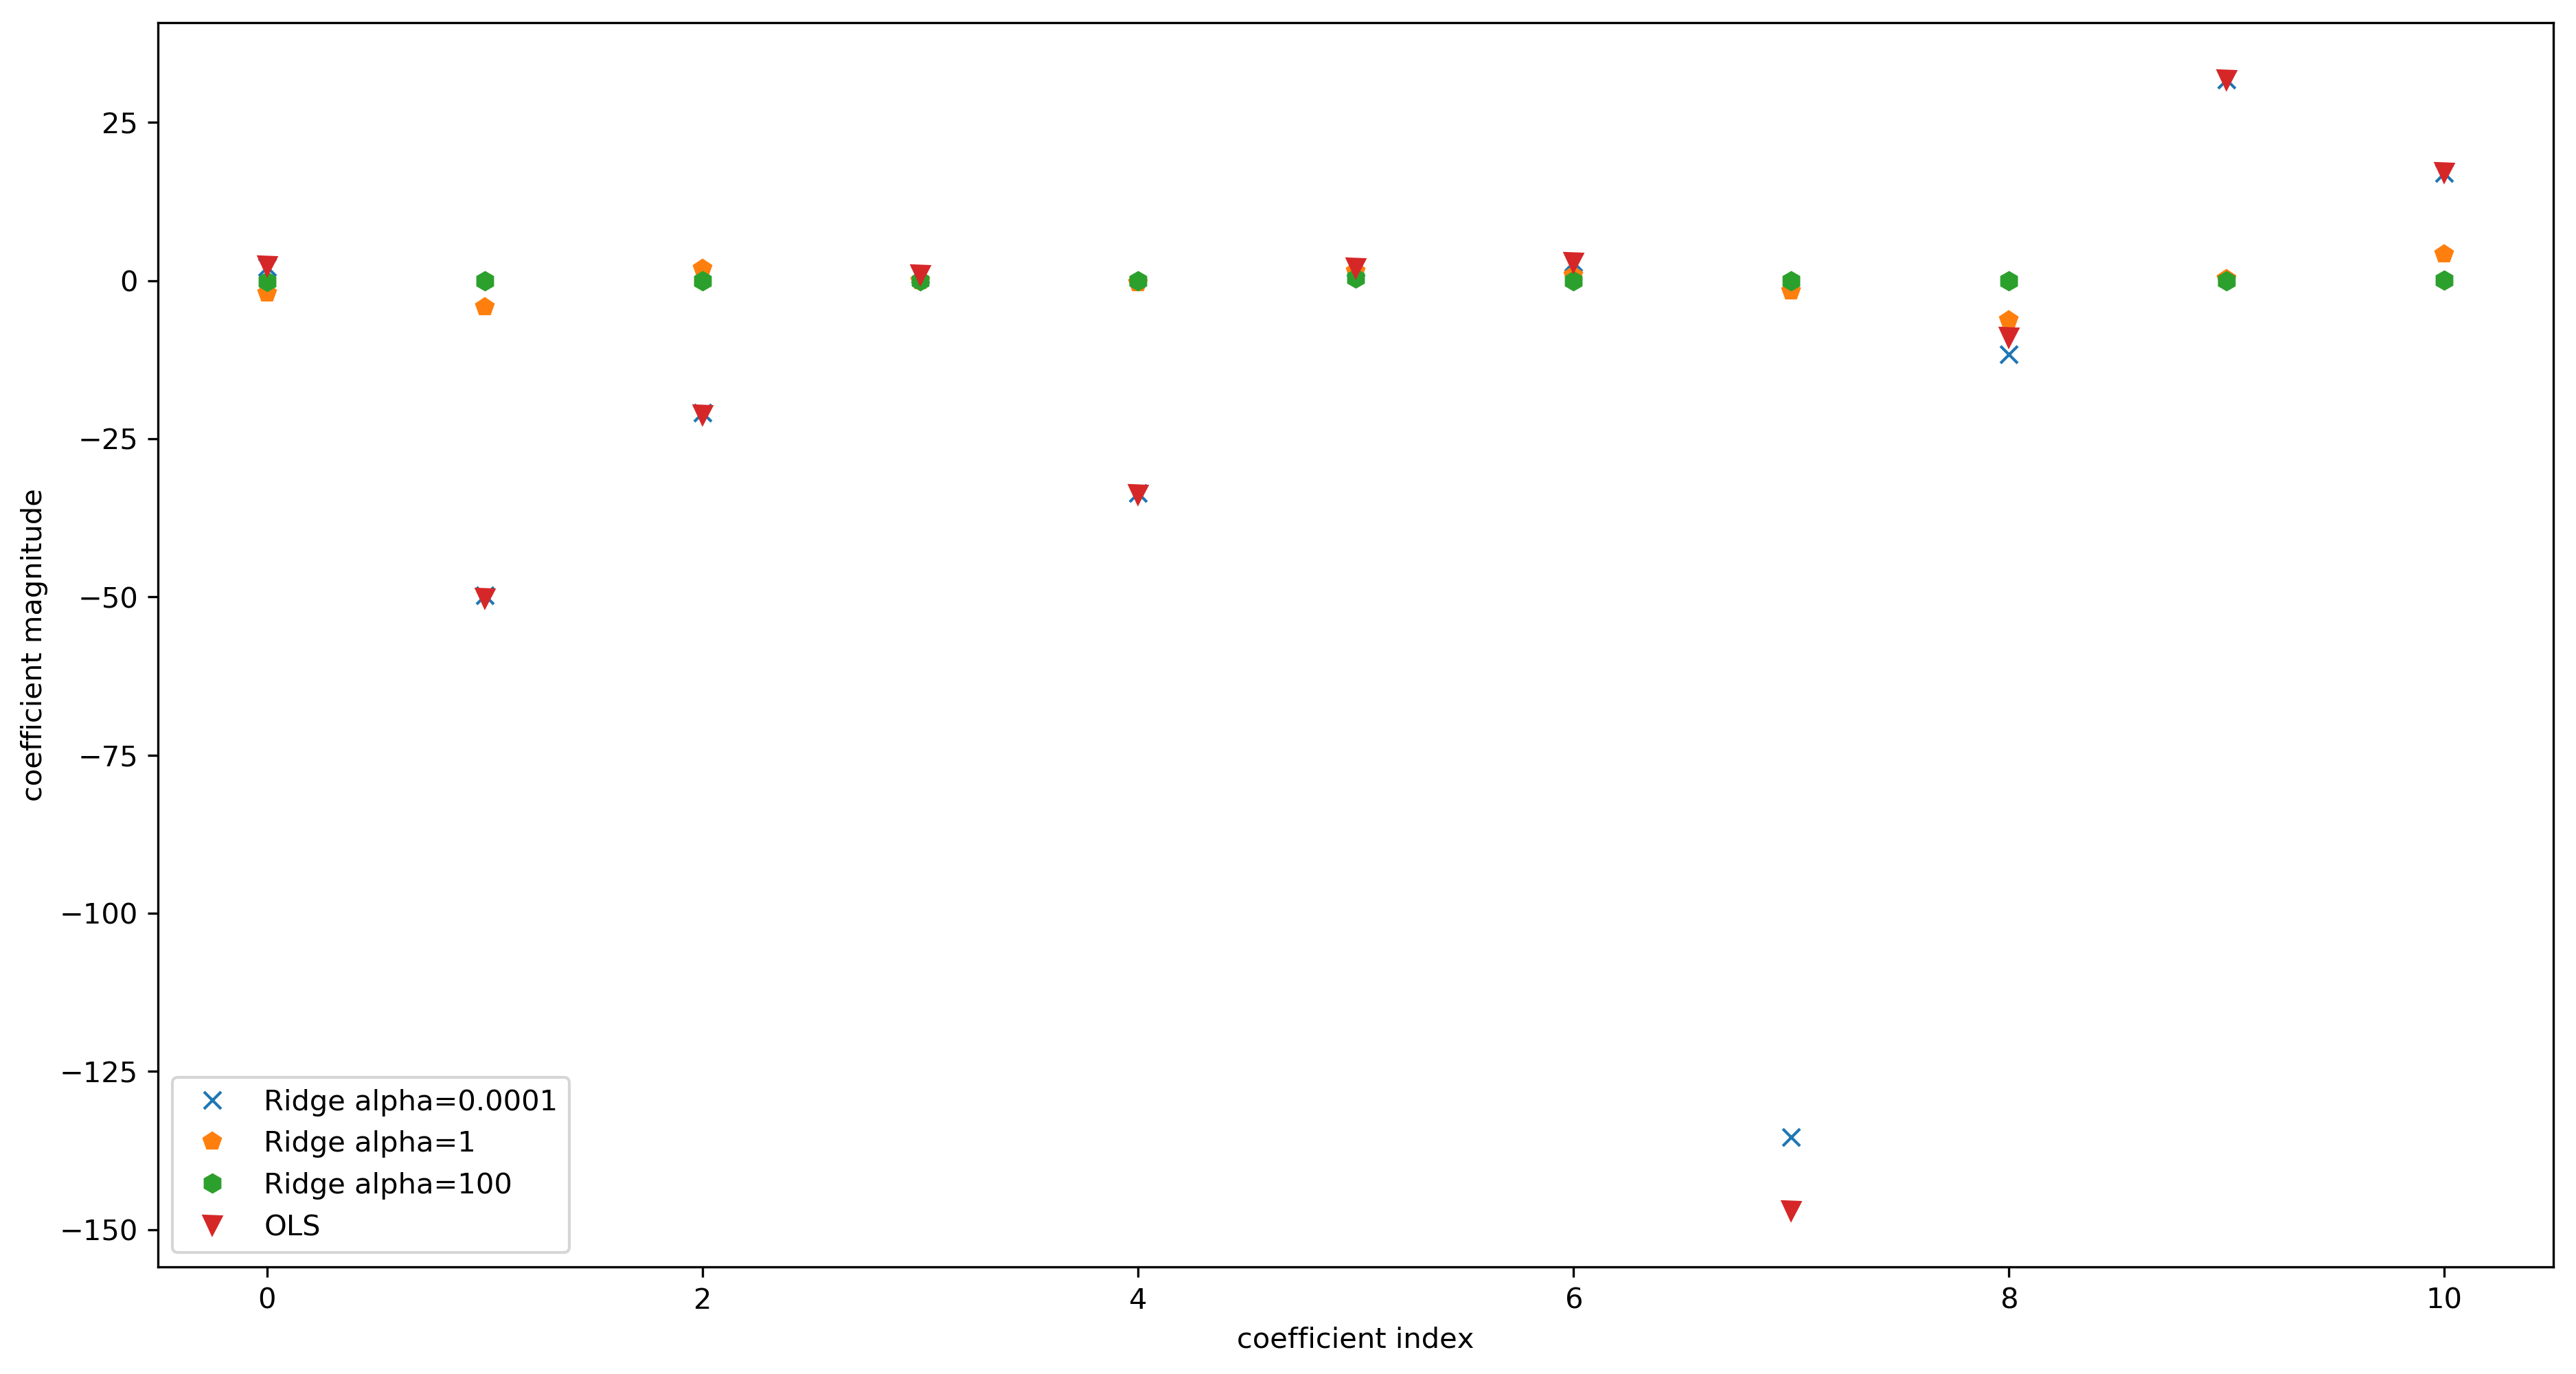

In [27]:
ridge100 = linear_model.Ridge(alpha=100).fit(X_train, y_train)
ridge1 = linear_model.Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(15, 8))
plt.plot(ridge.coef_[0], 'x', label='Ridge alpha=0.0001')
plt.plot(ridge1.coef_[0], 'p', label='Ridge alpha=1')
plt.plot(ridge100.coef_[0], 'h', label='Ridge alpha=100')
plt.plot(lr.coef_[0], 'v', label='OLS')
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.legend(loc='lower left')

Text(0, 0.5, 'coefficient')

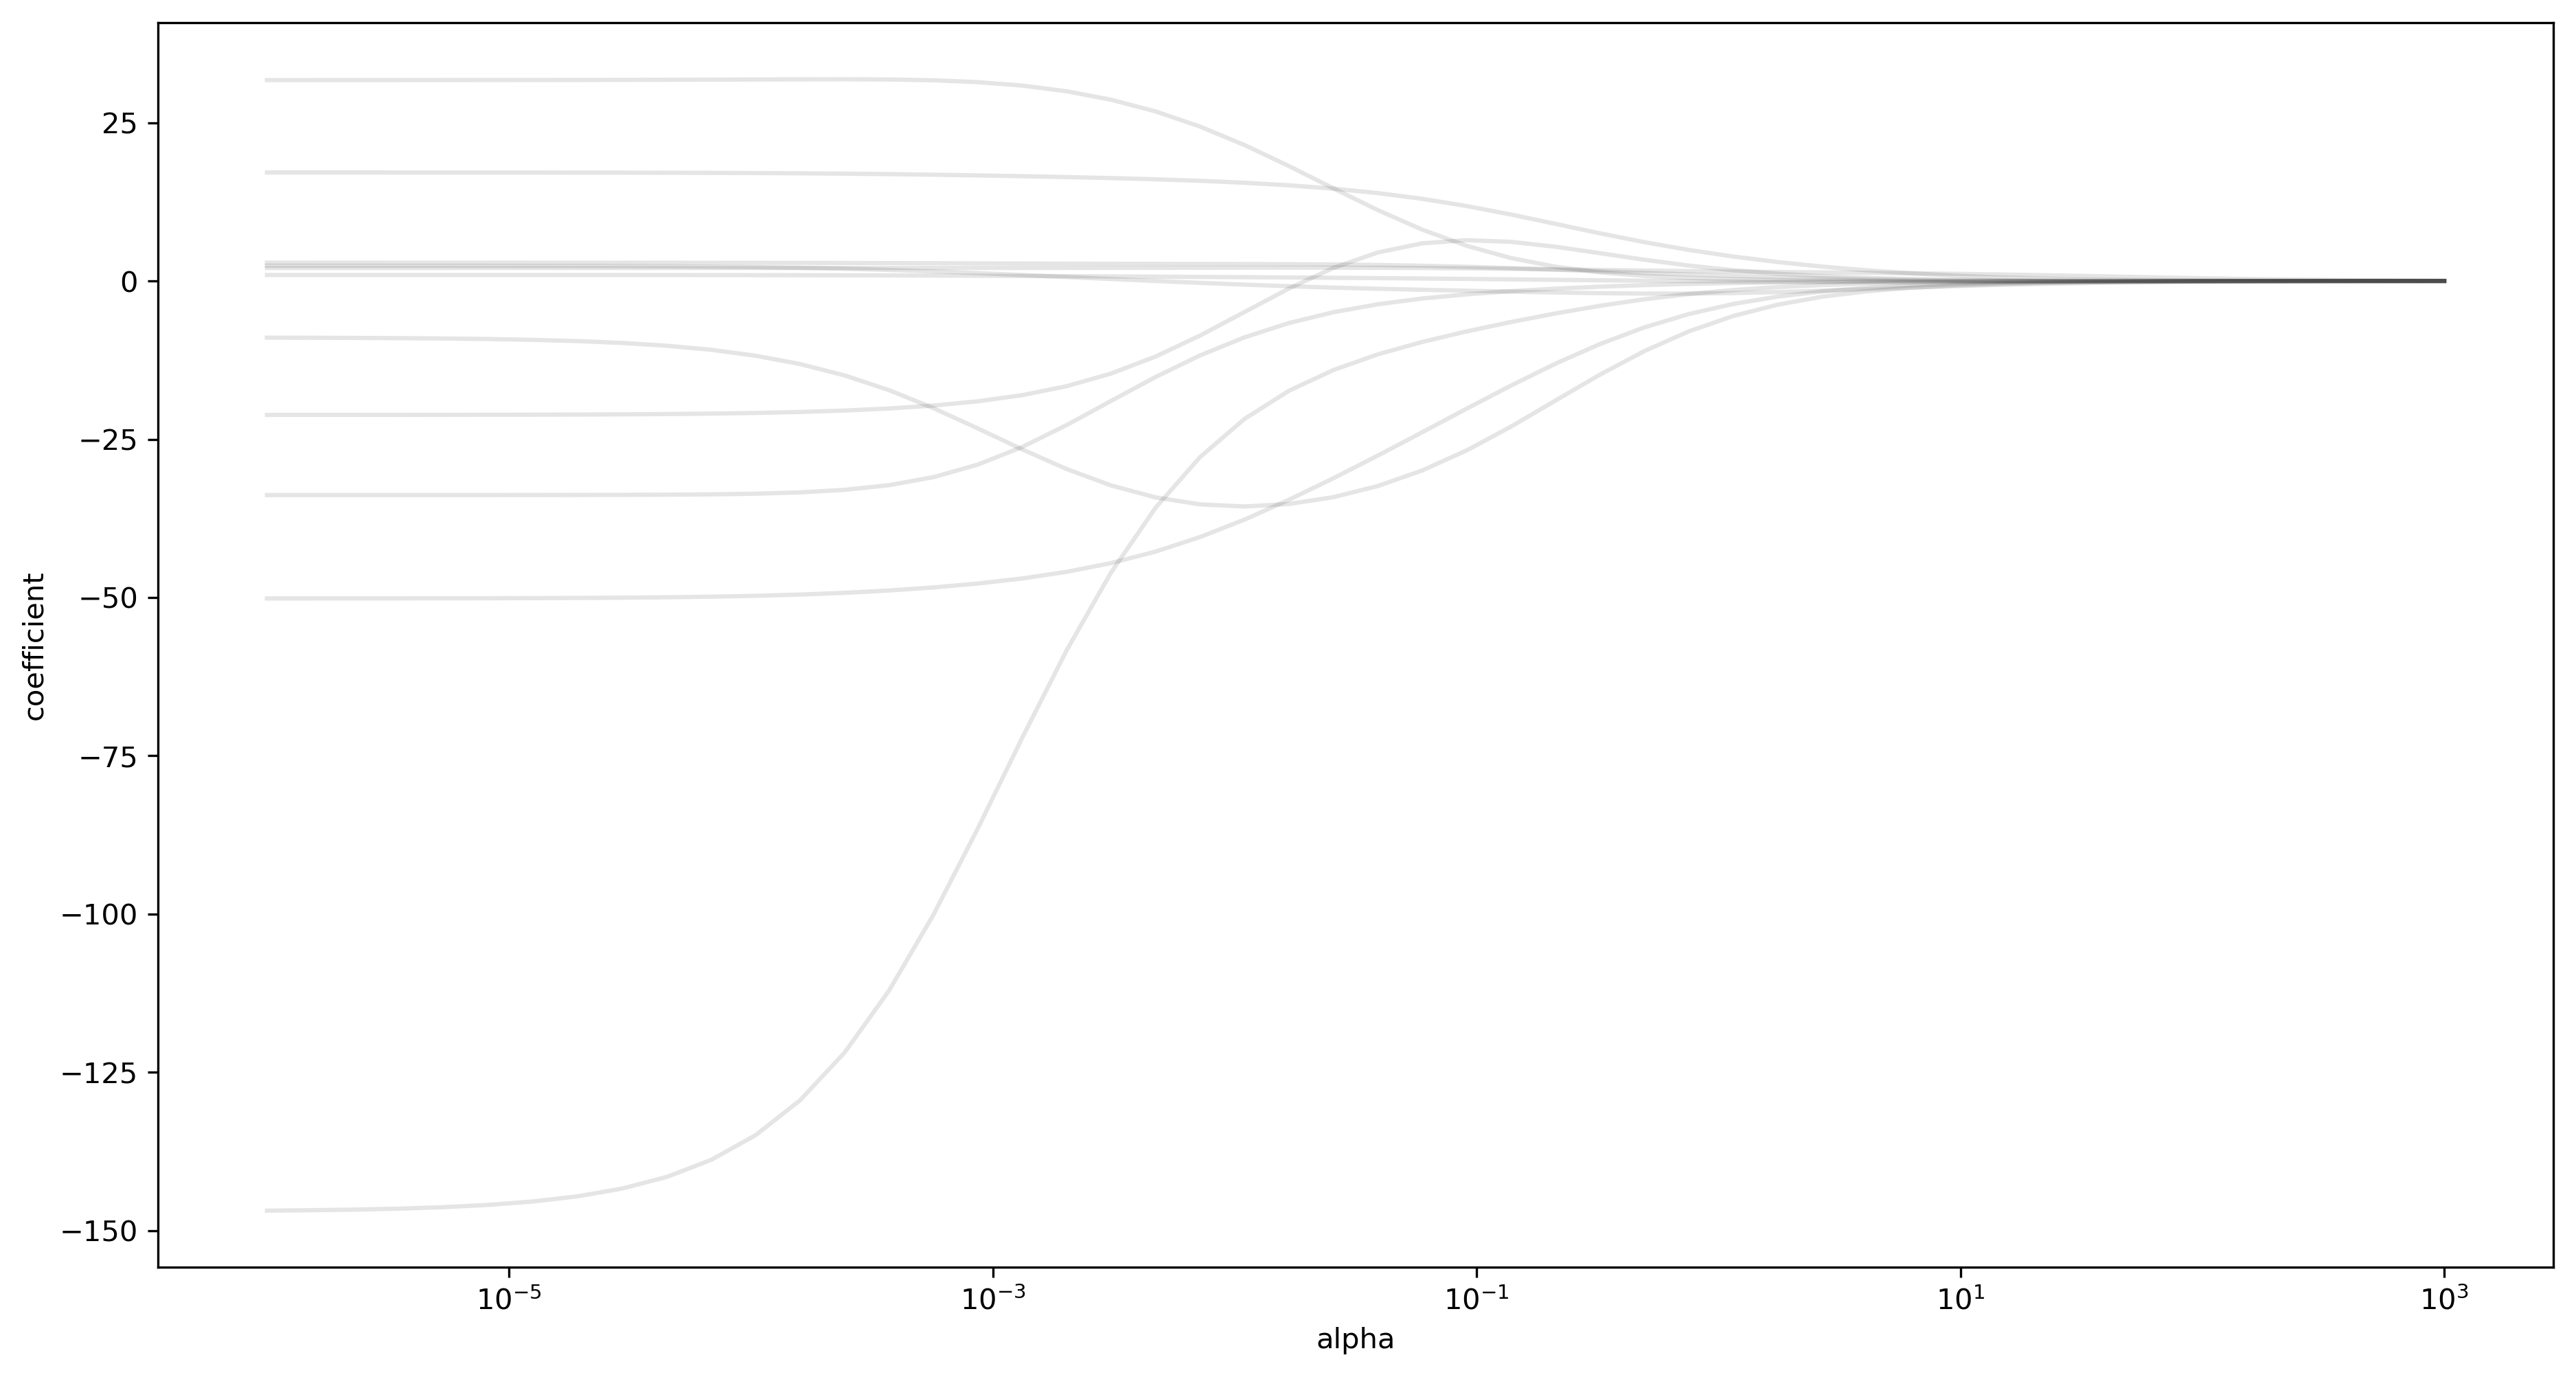

In [28]:
from sklearn.linear_model import Ridge
alphas = np.logspace(-6, 3)
plt.figure(figsize=(15, 8))
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_[0])


plt.plot(alphas, coefs, c='k', alpha=.1)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficient")

- The coefficients of features for OLS and Ridge (alpha=0.0001) are equivalent in magnitude.
- The coefficients of features for Ridge approaches to zero as the alpha goes up. The ridge regression shirnks the coefficients to zero. As result, high alpha, low regularization, and very complex model.

##### 5.2 Lasso 

Number of features used 11


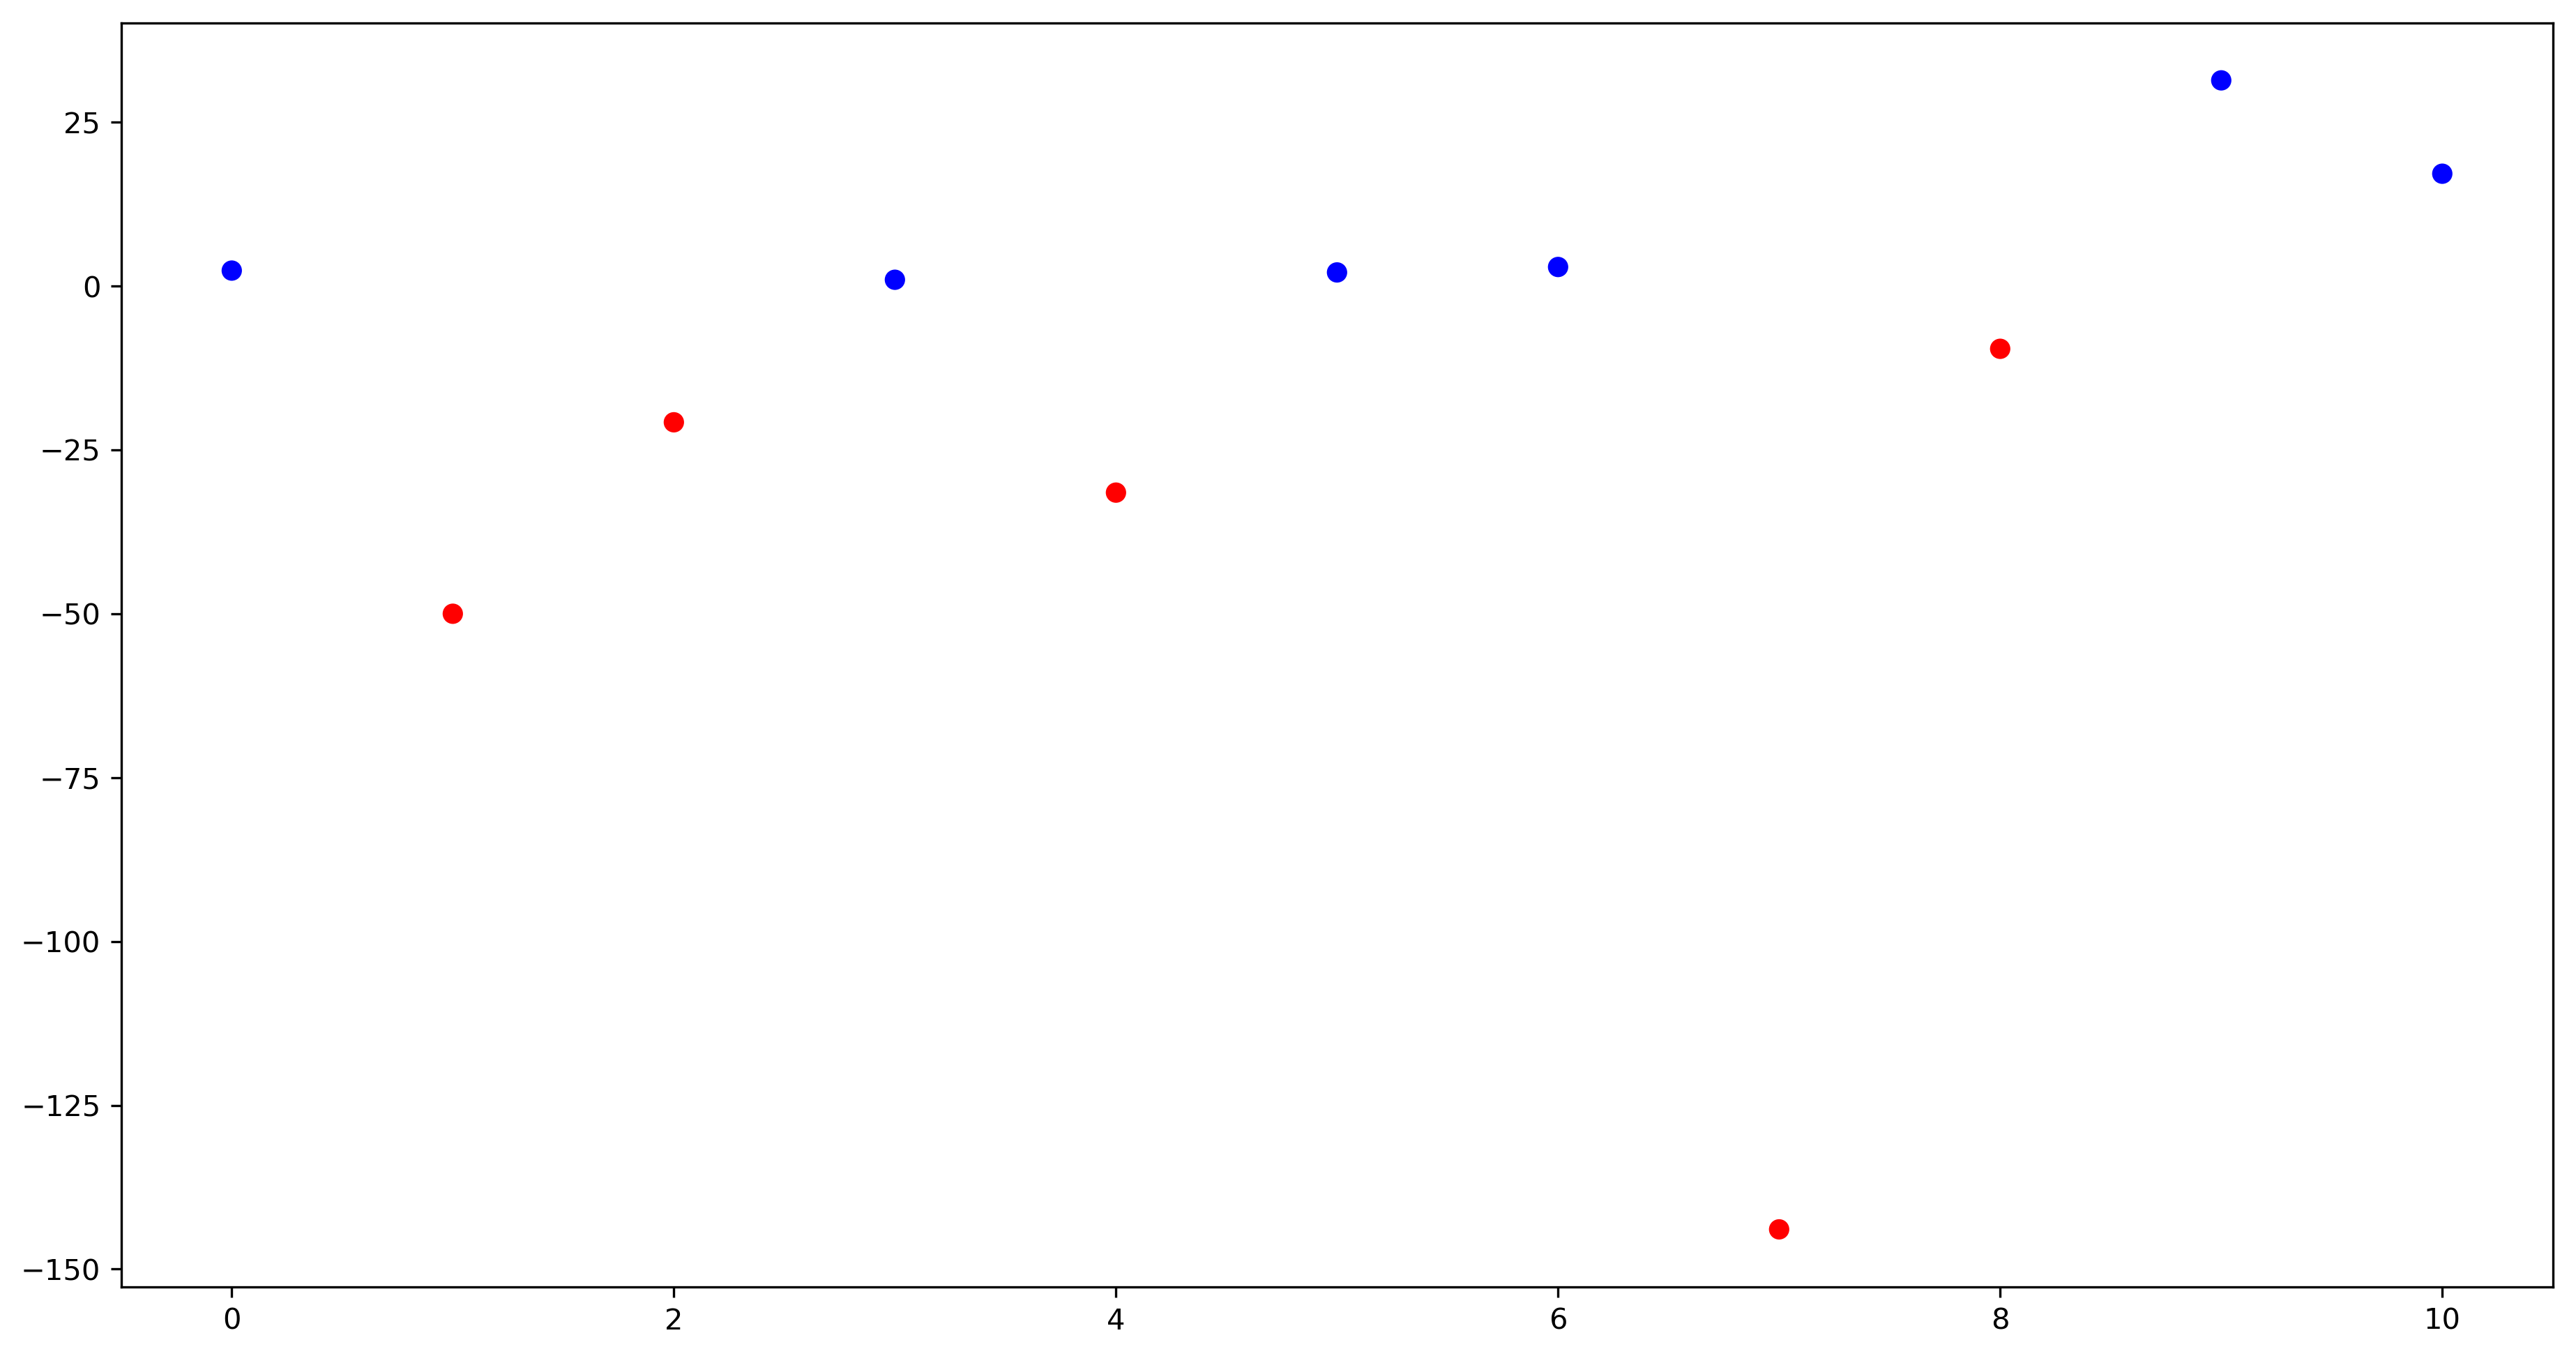

In [29]:
lasso = grid_lasso.best_estimator_
plt.figure(figsize=(15, 8))
plt.scatter(range(X_norm.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap='bwr_r')
print('Number of features used {}'.format(np.sum(lasso.coef_ != 0)))

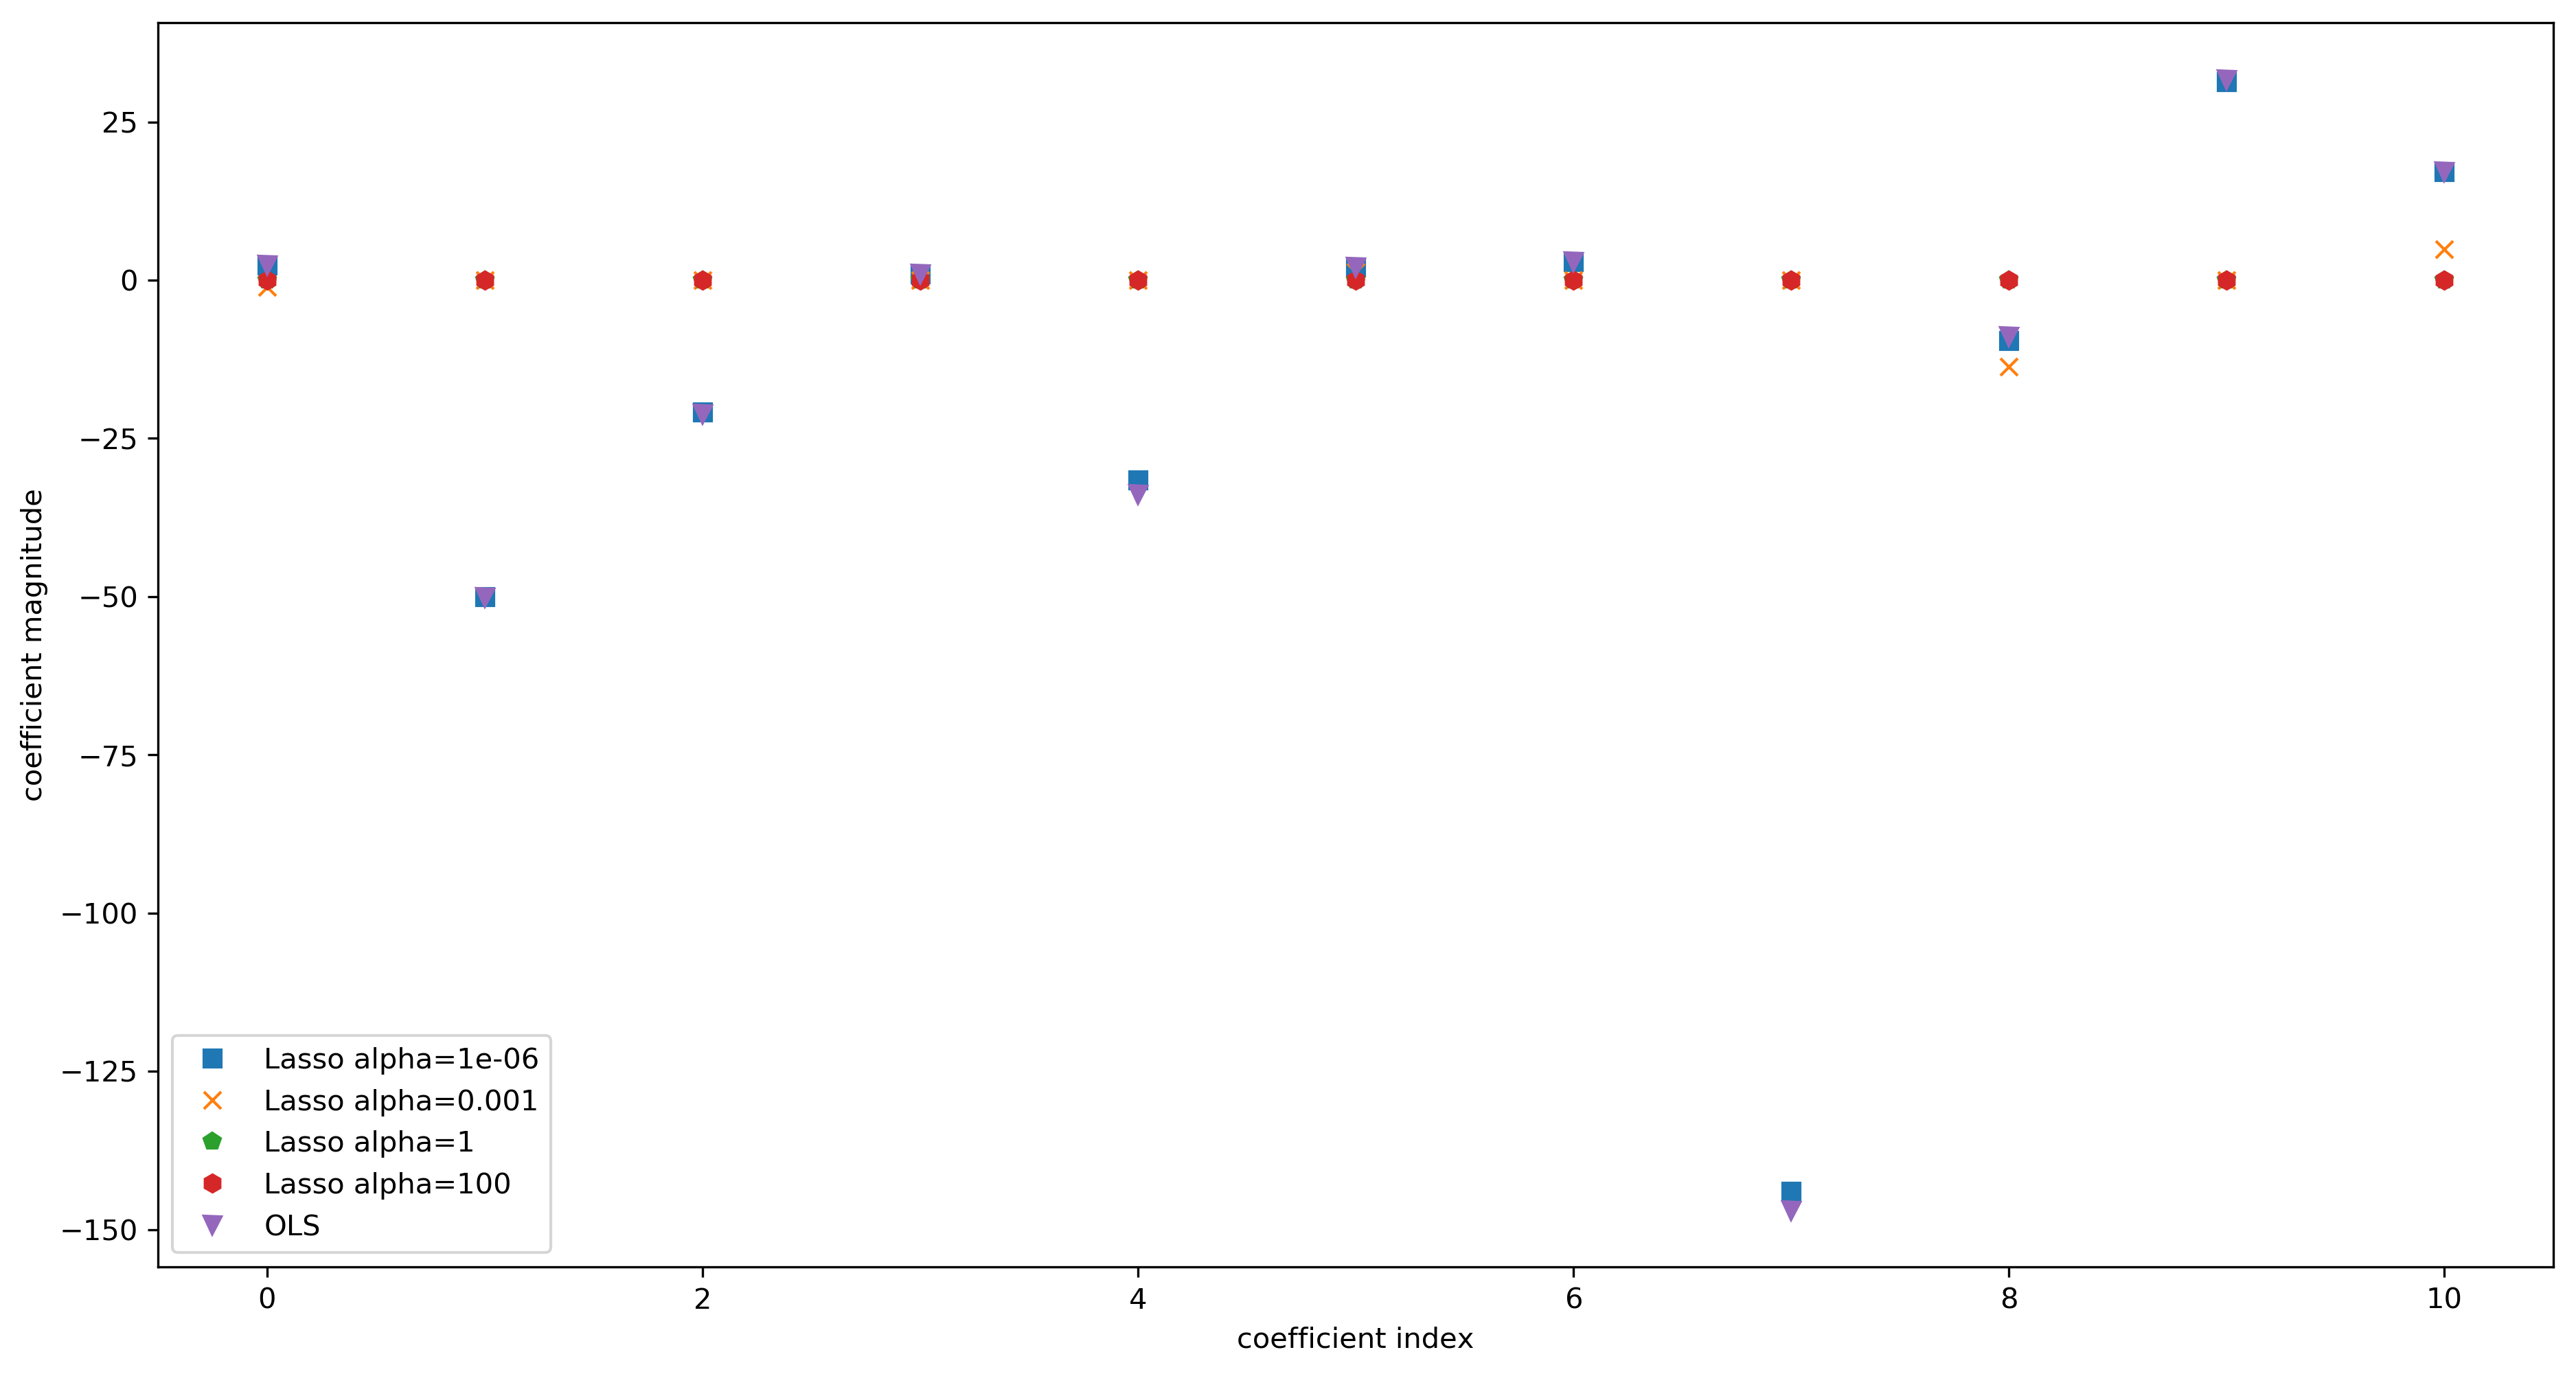

In [30]:
lasso001 = linear_model.Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
lasso1 = linear_model.Lasso(alpha=1, max_iter=100000).fit(X_train, y_train)
lasso100 = linear_model.Lasso(alpha=100, max_iter=100000).fit(X_train, y_train)
plt.figure(figsize=(15, 8))
plt.plot(lasso.coef_, 's', label='Lasso alpha=1e-06')
plt.plot(lasso001.coef_, 'x', label='Lasso alpha=0.001')
plt.plot(lasso1.coef_, 'p', label='Lasso alpha=1')
plt.plot(lasso100.coef_, 'h', label='Lasso alpha=100')
plt.plot(lr.coef_[0], 'v', label='OLS')
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.legend(loc='lower left')

Text(0, 0.5, 'coefficient')

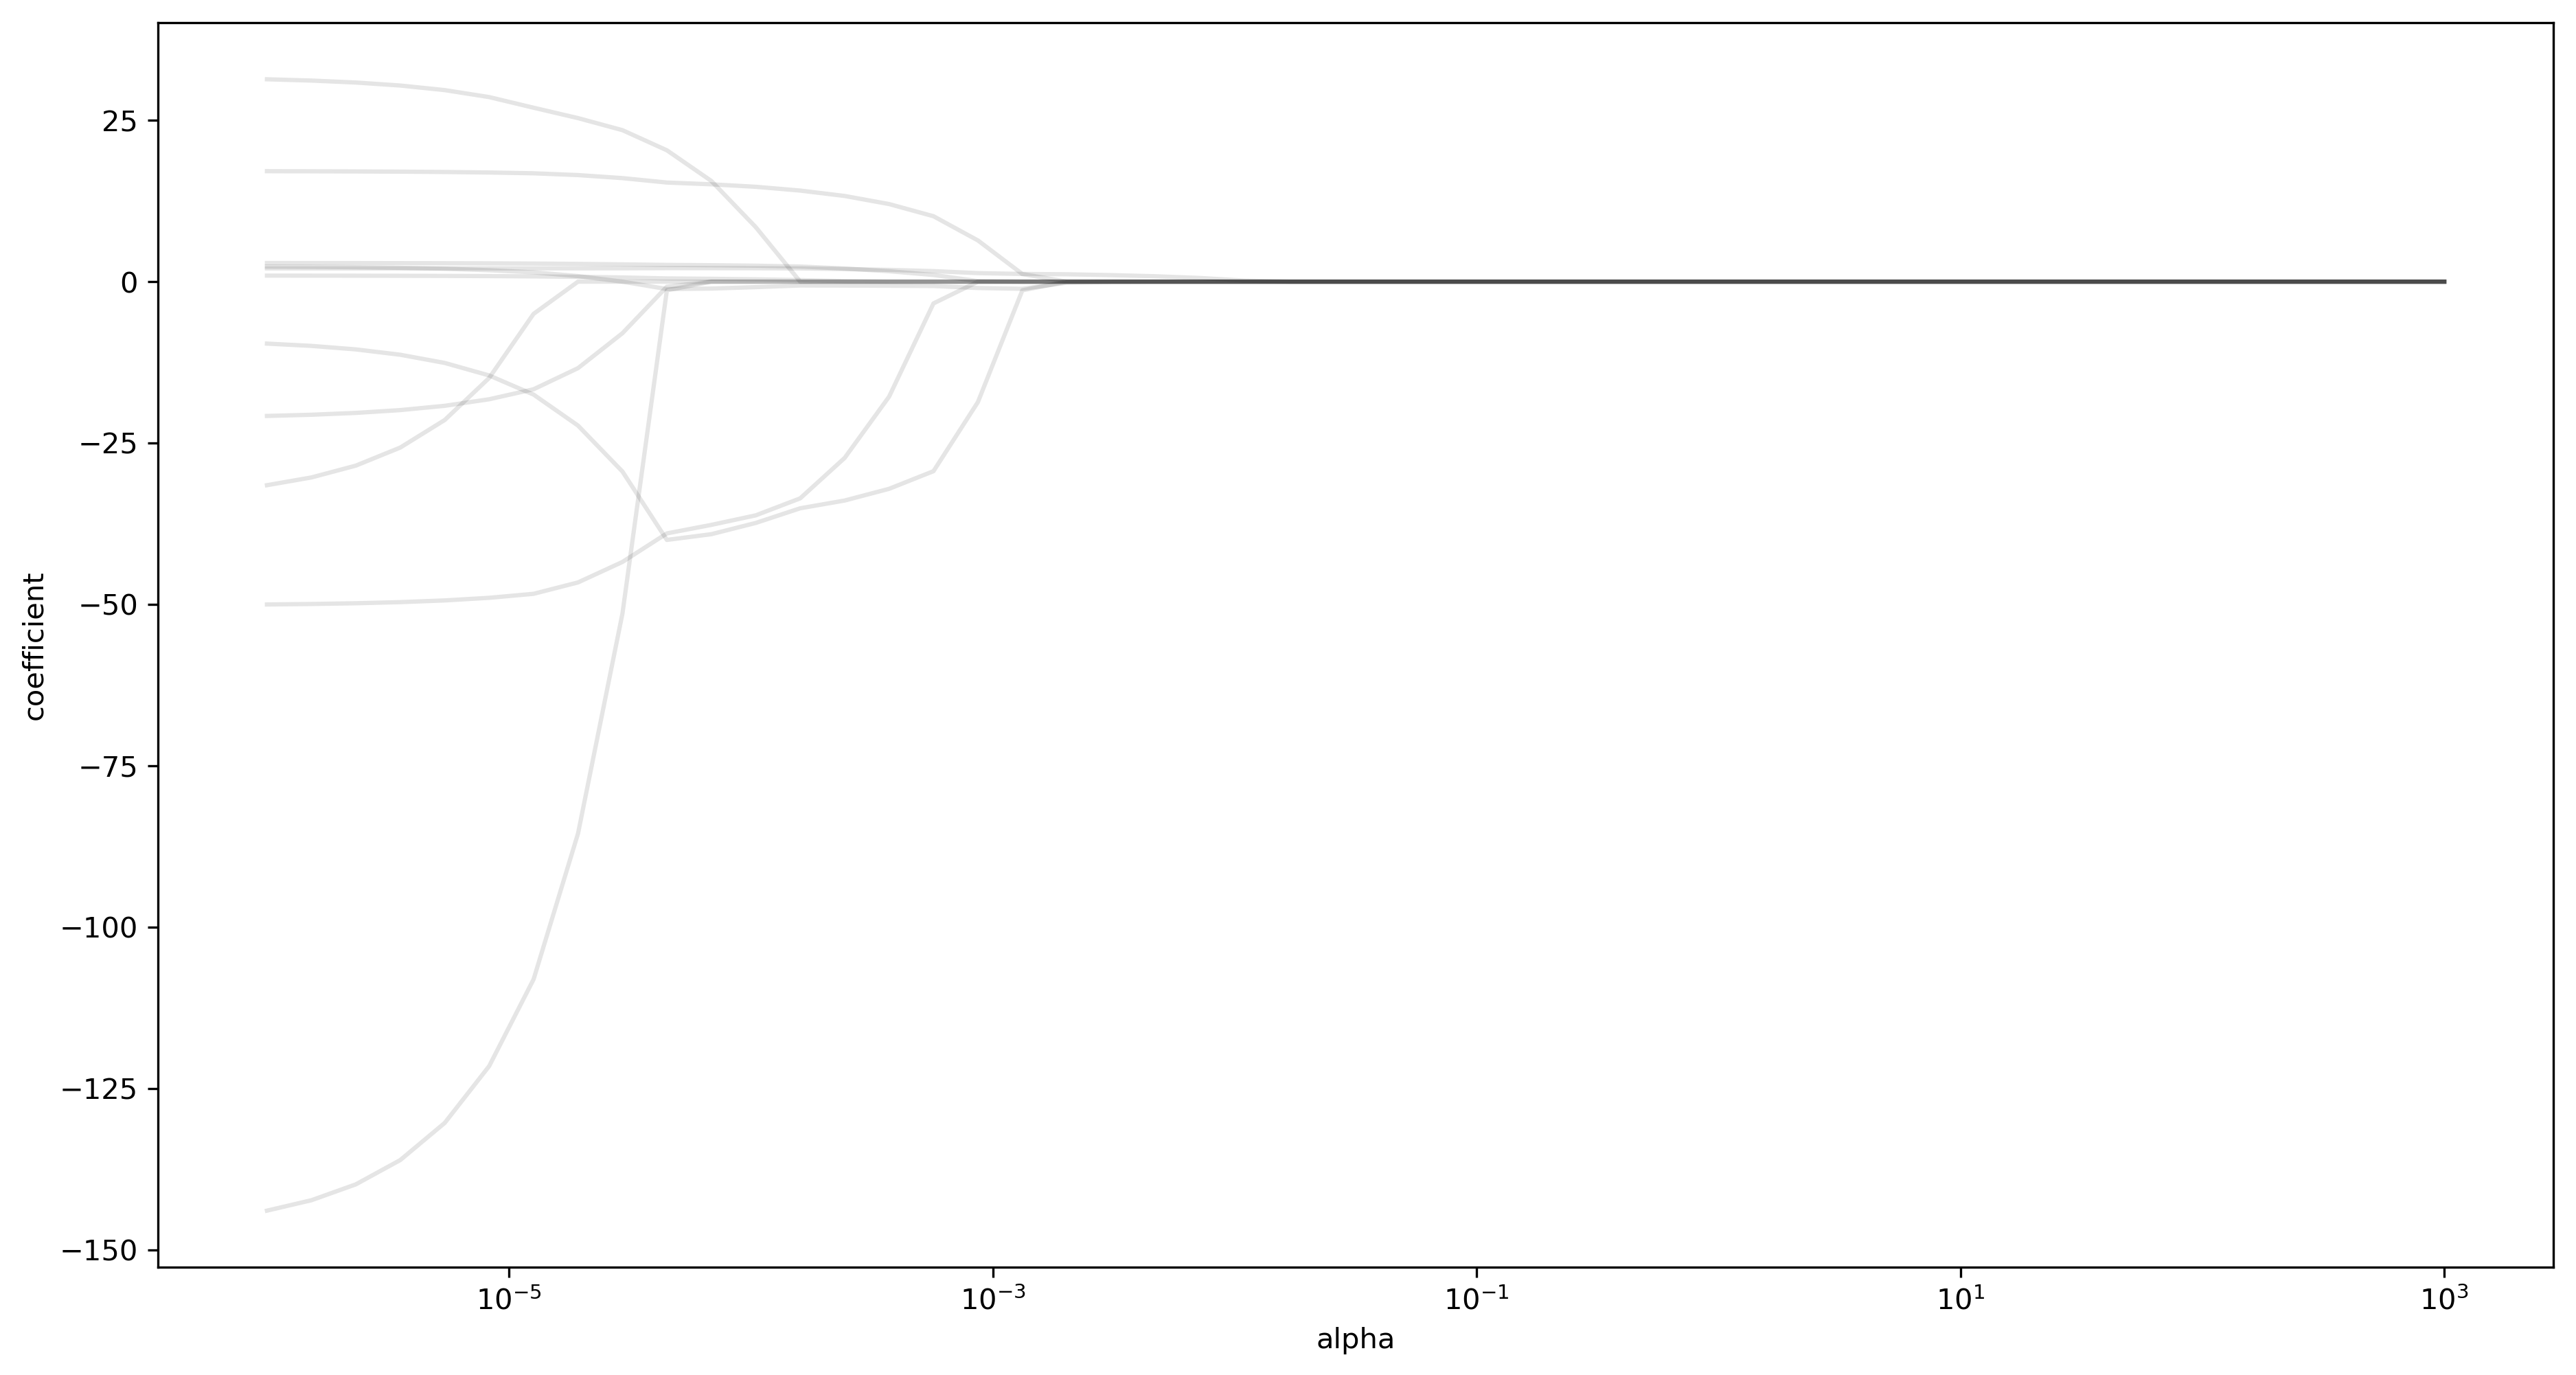

In [31]:
from sklearn.linear_model import Lasso
alphas = np.logspace(-6, 3)
plt.figure(figsize=(15, 8))
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=100000)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)


plt.plot(alphas, coefs, c='k', alpha=.1)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficient")

- The coefficients of features for OLS and Lasso (alpha=1e-06) are equivalent in magnitude.
- The coefficients of some features for lasso are set to zero and other coefficients approaches to zero as the alpha goes up. The lasso regression sets the coefficients to zero for some features, which does not explain any variance in dependant variable and shirnks the coefficients of other features to zero. As result, high alpha, low regularization, and very complex model.

##### 5.3 Interpret these plots and describe how their differences are related to the differences between the Ridge and Lasso regression algorithms.

- Ridge will control the coefficients of features so it brings the coefficients close to zero.
- Lasso also tries to contorl the coefficieints of features, the low important features will have coefficient zero.
- In this example, the difference is not clearly visiable with best models. There no features with zero coefficients and ridge barealy tries to bring the coeffcieints of features close to zero ( at alpha 0.0001). 

#### Problem 6: Classification problem

##### 6.1 New variable "quality_segment"

In [32]:
def derive_quality_segment(df):
    """ function to derive new variable """
    if df['quality'] <= 5:
        return 'BAD'
    elif df['quality'] > 5 and df['quality'] <= 7:
        return 'AVERAGE'
    elif df['quality'] > 7 and df['quality'] <= 10:
        return 'GOOD'
y['quality_segment'] = y.apply(derive_quality_segment, axis=1)
y_new = y[['quality_segment']]

In [33]:
le = preprocessing.LabelEncoder()
y_label = le.fit(y_new['quality_segment']).transform(y_new['quality_segment'])

In [34]:
y_new.quality_segment.value_counts()

AVERAGE    3915
BAD        2384
GOOD        198
Name: quality_segment, dtype: int64

##### 6.2 Train test split using new y

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_label, test_size=0.20, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((5197, 11), (1300, 11), (5197,), (1300,))

##### 6.3 Modeling

Lets look at the distribution of classes in the dataset.

In [36]:
pd.Series(y_train).value_counts()

0    3103
1    1933
2     161
dtype: int64

The class ditribution is imbalanced in the dataset. So, we will use
 - StratifiedKFold while searching hyperparameters with cross validation.
 - class_weights='balanced' in logistic regression to give more imporatance to each row in minority class.

###### 6.3.1 The k-nearest neighbours classifier

KNN needs alteration in source code by adding coefficients (weights) to the distance equation such that the distance is amplified for the records belonging to the majority class. So, we will not do this as part of this excercise.

In [37]:
cross_val_scores = []
param_grid = {'n_neighbors': np.arange(1, 30, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, 
                    cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True))
grid.fit(X_train, y_train)
print('best mean cross-validation score: {:.3f}'.format(grid.best_score_))
print('best n_neighbors: {}'.format(grid.best_params_))
print('test-set score: {:.3f}'.format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.702
best n_neighbors: {'n_neighbors': 1}
test-set score: 0.708


The k value is very low, it means the model is overfitting on the datapoints.

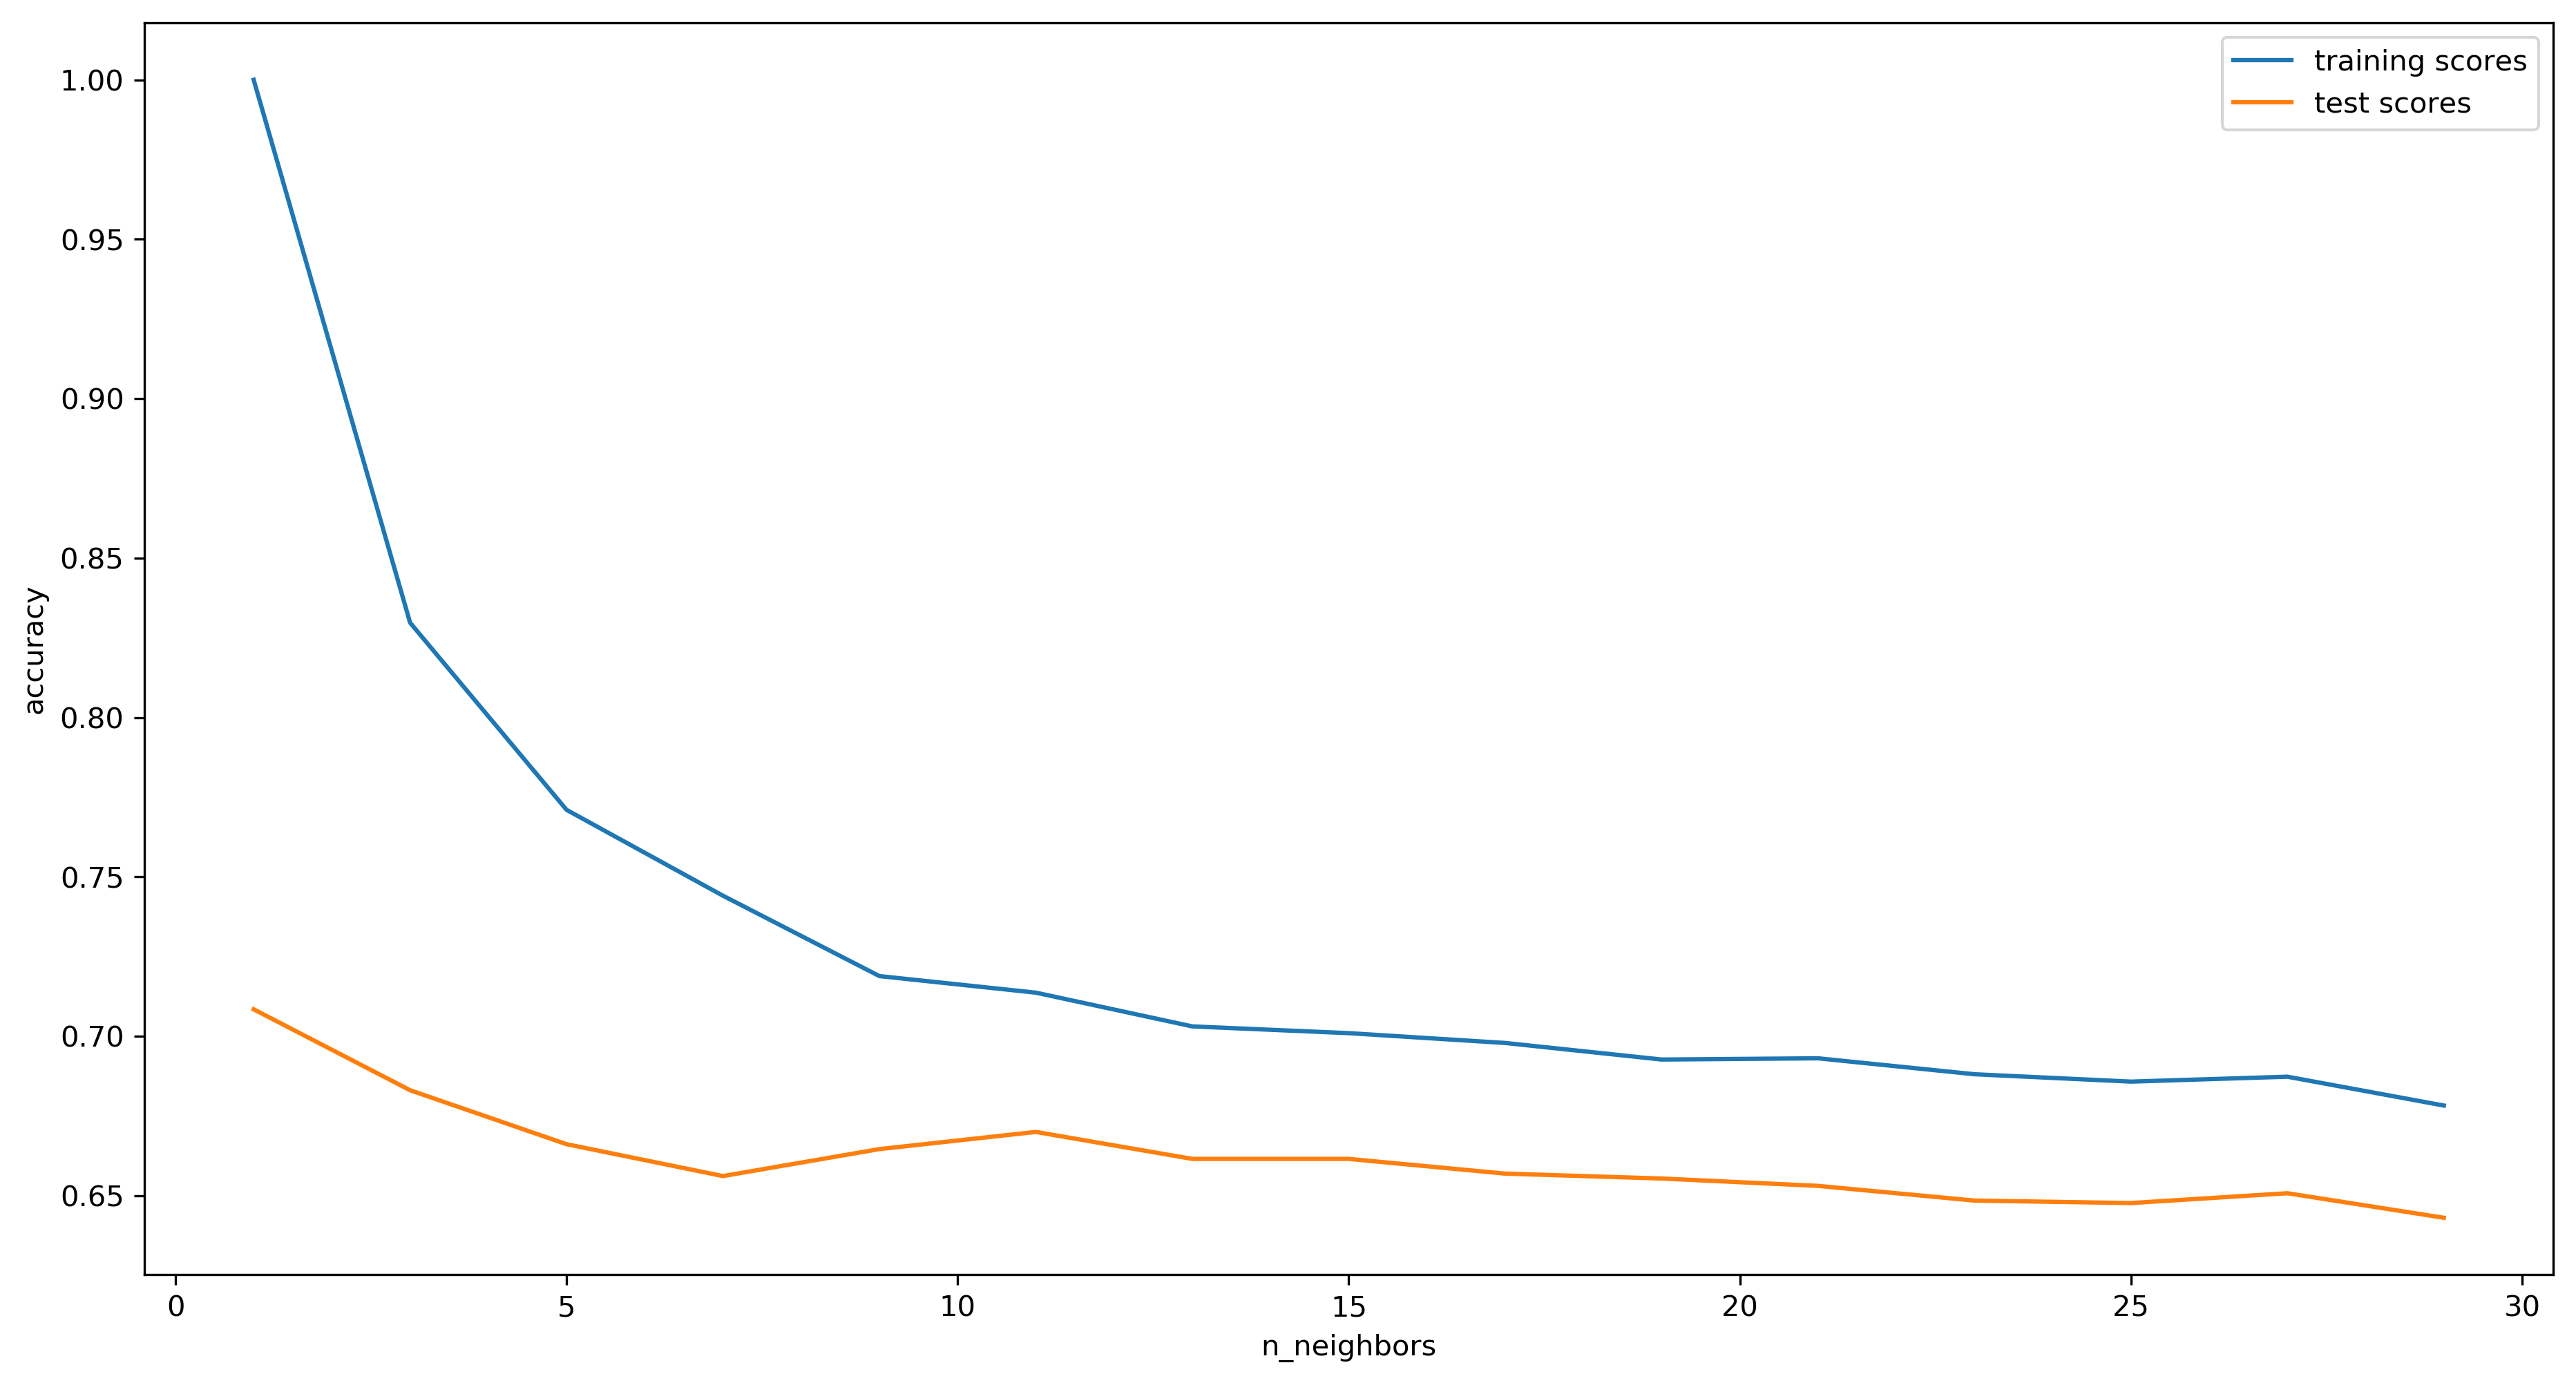

In [38]:
neighbors = range(1, 30, 2)
training_scores = []
test_scores = []
for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(15, 8))
plt.plot(neighbors, training_scores, label="training scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [39]:
y_pred = grid.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('misclassified datapoints: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('accuracy: {:.3f}'.format(accuracy))

misclassified datapoints: 379
accuracy: 0.708


In [40]:
pd.Series(y_pred).value_counts()

0    794
1    469
2     37
dtype: int64

KNN is still able to classify the datapoints to GOOD category (2) even though GOOD data points are minority in train dataset.

In [41]:
confusion_matrix(y_test,y_pred)

array([[617, 177,  18],
       [158, 289,   4],
       [ 19,   3,  15]])

The main diagonal gives the correct predictions. That is, the cases where the actual values and the model predictions are the same.

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       812
           1       0.62      0.64      0.63       451
           2       0.41      0.41      0.41        37

   micro avg       0.71      0.71      0.71      1300
   macro avg       0.60      0.60      0.60      1300
weighted avg       0.71      0.71      0.71      1300



- Precision: the ability of classifier not to classify as positive when actually it is negative is very low for GOOD category
- Recall: the ability of classifier to find all positive instances, is very low for GOOD category.
- The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 
- As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

###### 6.3.1 Linear models for classification

###### 6.3.1.1 Learning without balancing the class distribution

In [43]:
def grid_search_cv(X, y):
    tuned_parameters = {"C":np.logspace(-6, 3, 10)}
    clf = LogisticRegression(multi_class='multinomial',
                             solver='lbfgs', 
                             random_state=42, 
                             max_iter=100000)
    logreg_cv = GridSearchCV(clf,
                             tuned_parameters, 
                             cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True))
    logreg_cv.fit(X,y)
    return logreg_cv.best_params_, logreg_cv.best_score_, logreg_cv.best_estimator_

In [44]:
best_params, best_score, best_model = grid_search_cv(X_train, y_train)
print('best mean cross-validation score: {:.3f}'.format(best_score))
print('best n_neighbors: {}'.format(best_params))
print('test-set score: {:.3f}'.format(best_model.score(X_test, y_test)))

best mean cross-validation score: 0.684
best n_neighbors: {'C': 1000.0}
test-set score: 0.682


In [45]:
y_pred = best_model.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('misclassified datapoints: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('accuracy: {:.3f}'.format(accuracy))

misclassified datapoints: 414
accuracy: 0.682


In [46]:
pd.Series(y_pred).value_counts()

0    976
1    324
dtype: int64

Logistic Regression is not able to classify the datapoints to GOOD category (2) since GOOD data points are minority in train dataset.

In [47]:
confusion_matrix(y_test,y_pred)

array([[687, 125,   0],
       [252, 199,   0],
       [ 37,   0,   0]])

The main diagonal gives the correct predictions. That is, the cases where the actual values and the model predictions are the same.

In [48]:
print(classification_report(y_test, y_pred)) # the warning is due missing samples in class.

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       812
           1       0.61      0.44      0.51       451
           2       0.00      0.00      0.00        37

   micro avg       0.68      0.68      0.68      1300
   macro avg       0.44      0.43      0.43      1300
weighted avg       0.65      0.68      0.66      1300



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- Precision: the ability of classifier not to classify as positive when actually it is negative is zero for GOOD category
- Recall: the ability of classifier to find all positive instances, is also zero for GOOD category.

Therefore, if dont balance the class distribution in dataset, the classifier loses the ability to classify the datapoints to GOOD category.

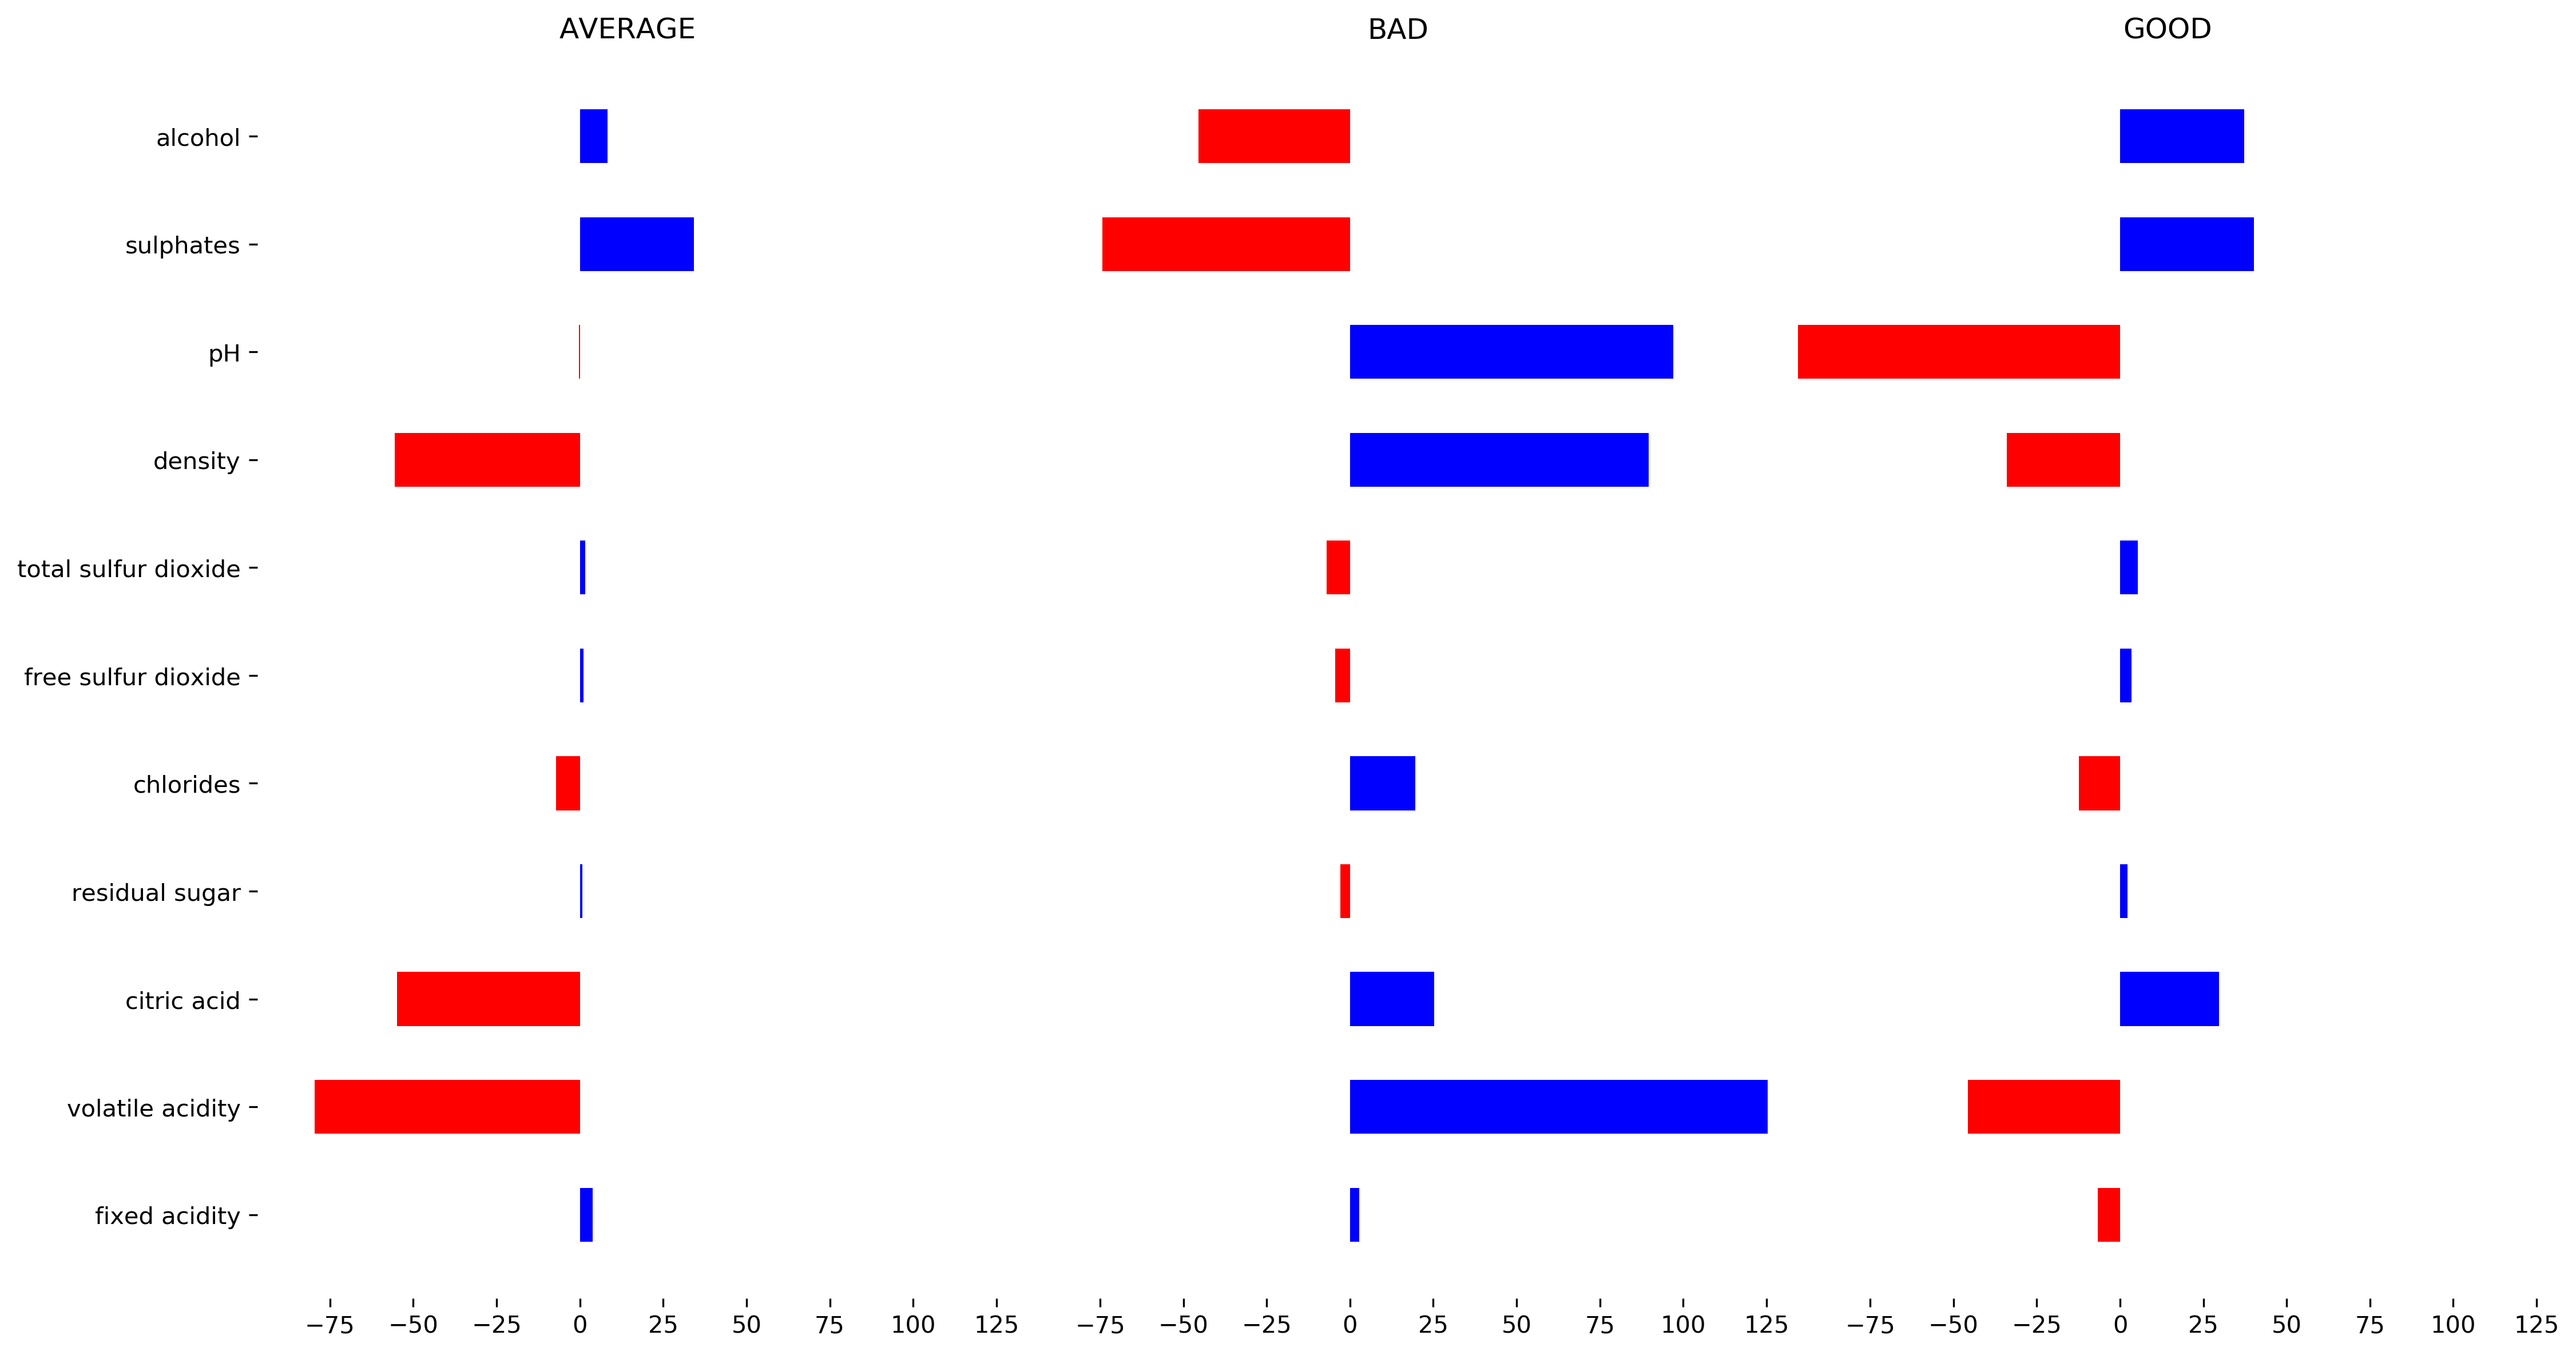

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
for ax, coef, classname in zip(axes, best_model.coef_, Counter(sorted(list(le.inverse_transform(y_train)))).keys()):
    ax.barh(range(len(X.columns)), coef, height=.5, color=plt.cm.bwr_r(np.sign(coef)))
    ax.set_xlim(best_model.coef_.min() - .1, best_model.coef_.max() + .1)

    ax.set_title(classname)
    ax.set_frame_on(False)
    ax.set_yticks(())
    
axes[0].set_yticks(range(len(X.columns)))
axes[0].set_yticklabels(X.columns)
plt.tight_layout()

###### 6.3.1.2 Learning by balancing the class distribution

The class_weight='balanced' is set to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). if you don't use the adjusted weights, the model always predicts that each data point belongs to class with majority data points as odds are high compared to not. Therefore, the accuracy may be better but there possibility of high false positives.

In [50]:
def grid_search_cv(X, y):
    tuned_parameters = {"C":np.logspace(-6, 3, 10)}
    clf = LogisticRegression(multi_class='multinomial',
                             solver='lbfgs', 
                             random_state=42, 
                             max_iter=100000, 
                             class_weight='balanced')
    logreg_cv = GridSearchCV(clf,
                             tuned_parameters, 
                             cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True))
    logreg_cv.fit(X,y)
    return logreg_cv.best_params_, logreg_cv.best_score_, logreg_cv.best_estimator_

In [51]:
best_params, best_score, best_model = grid_search_cv(X_train, y_train)
print('best mean cross-validation score: {:.3f}'.format(best_score))
print('best n_neighbors: {}'.format(best_params))
print('test-set score: {:.3f}'.format(best_model.score(X_test, y_test)))

best mean cross-validation score: 0.457
best n_neighbors: {'C': 1000.0}
test-set score: 0.446


In [52]:
y_pred = best_model.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('misclassified datapoints: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('accuracy: {:.3f}'.format(accuracy))

misclassified datapoints: 720
accuracy: 0.446


In [53]:
pd.Series(y_pred).value_counts()

1    653
2    372
0    275
dtype: int64

Logistic Regression is now able to classify the datapoints to GOOD category (2) even though GOOD data points are minority in train dataset.

In [54]:
confusion_matrix(y_test,y_pred)

array([[206, 303, 303],
       [ 64, 346,  41],
       [  5,   4,  28]])

The main diagonal gives the correct predictions. That is, the cases where the actual values and the model predictions are the same.

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.25      0.38       812
           1       0.53      0.77      0.63       451
           2       0.08      0.76      0.14        37

   micro avg       0.45      0.45      0.45      1300
   macro avg       0.45      0.59      0.38      1300
weighted avg       0.65      0.45      0.46      1300



- Precision: the ability of classifier not to classify as positive when actually it is negative is still low for GOOD category
- Recall: the ability of classifier to find all positive instances, is very low for AVERAGE category.

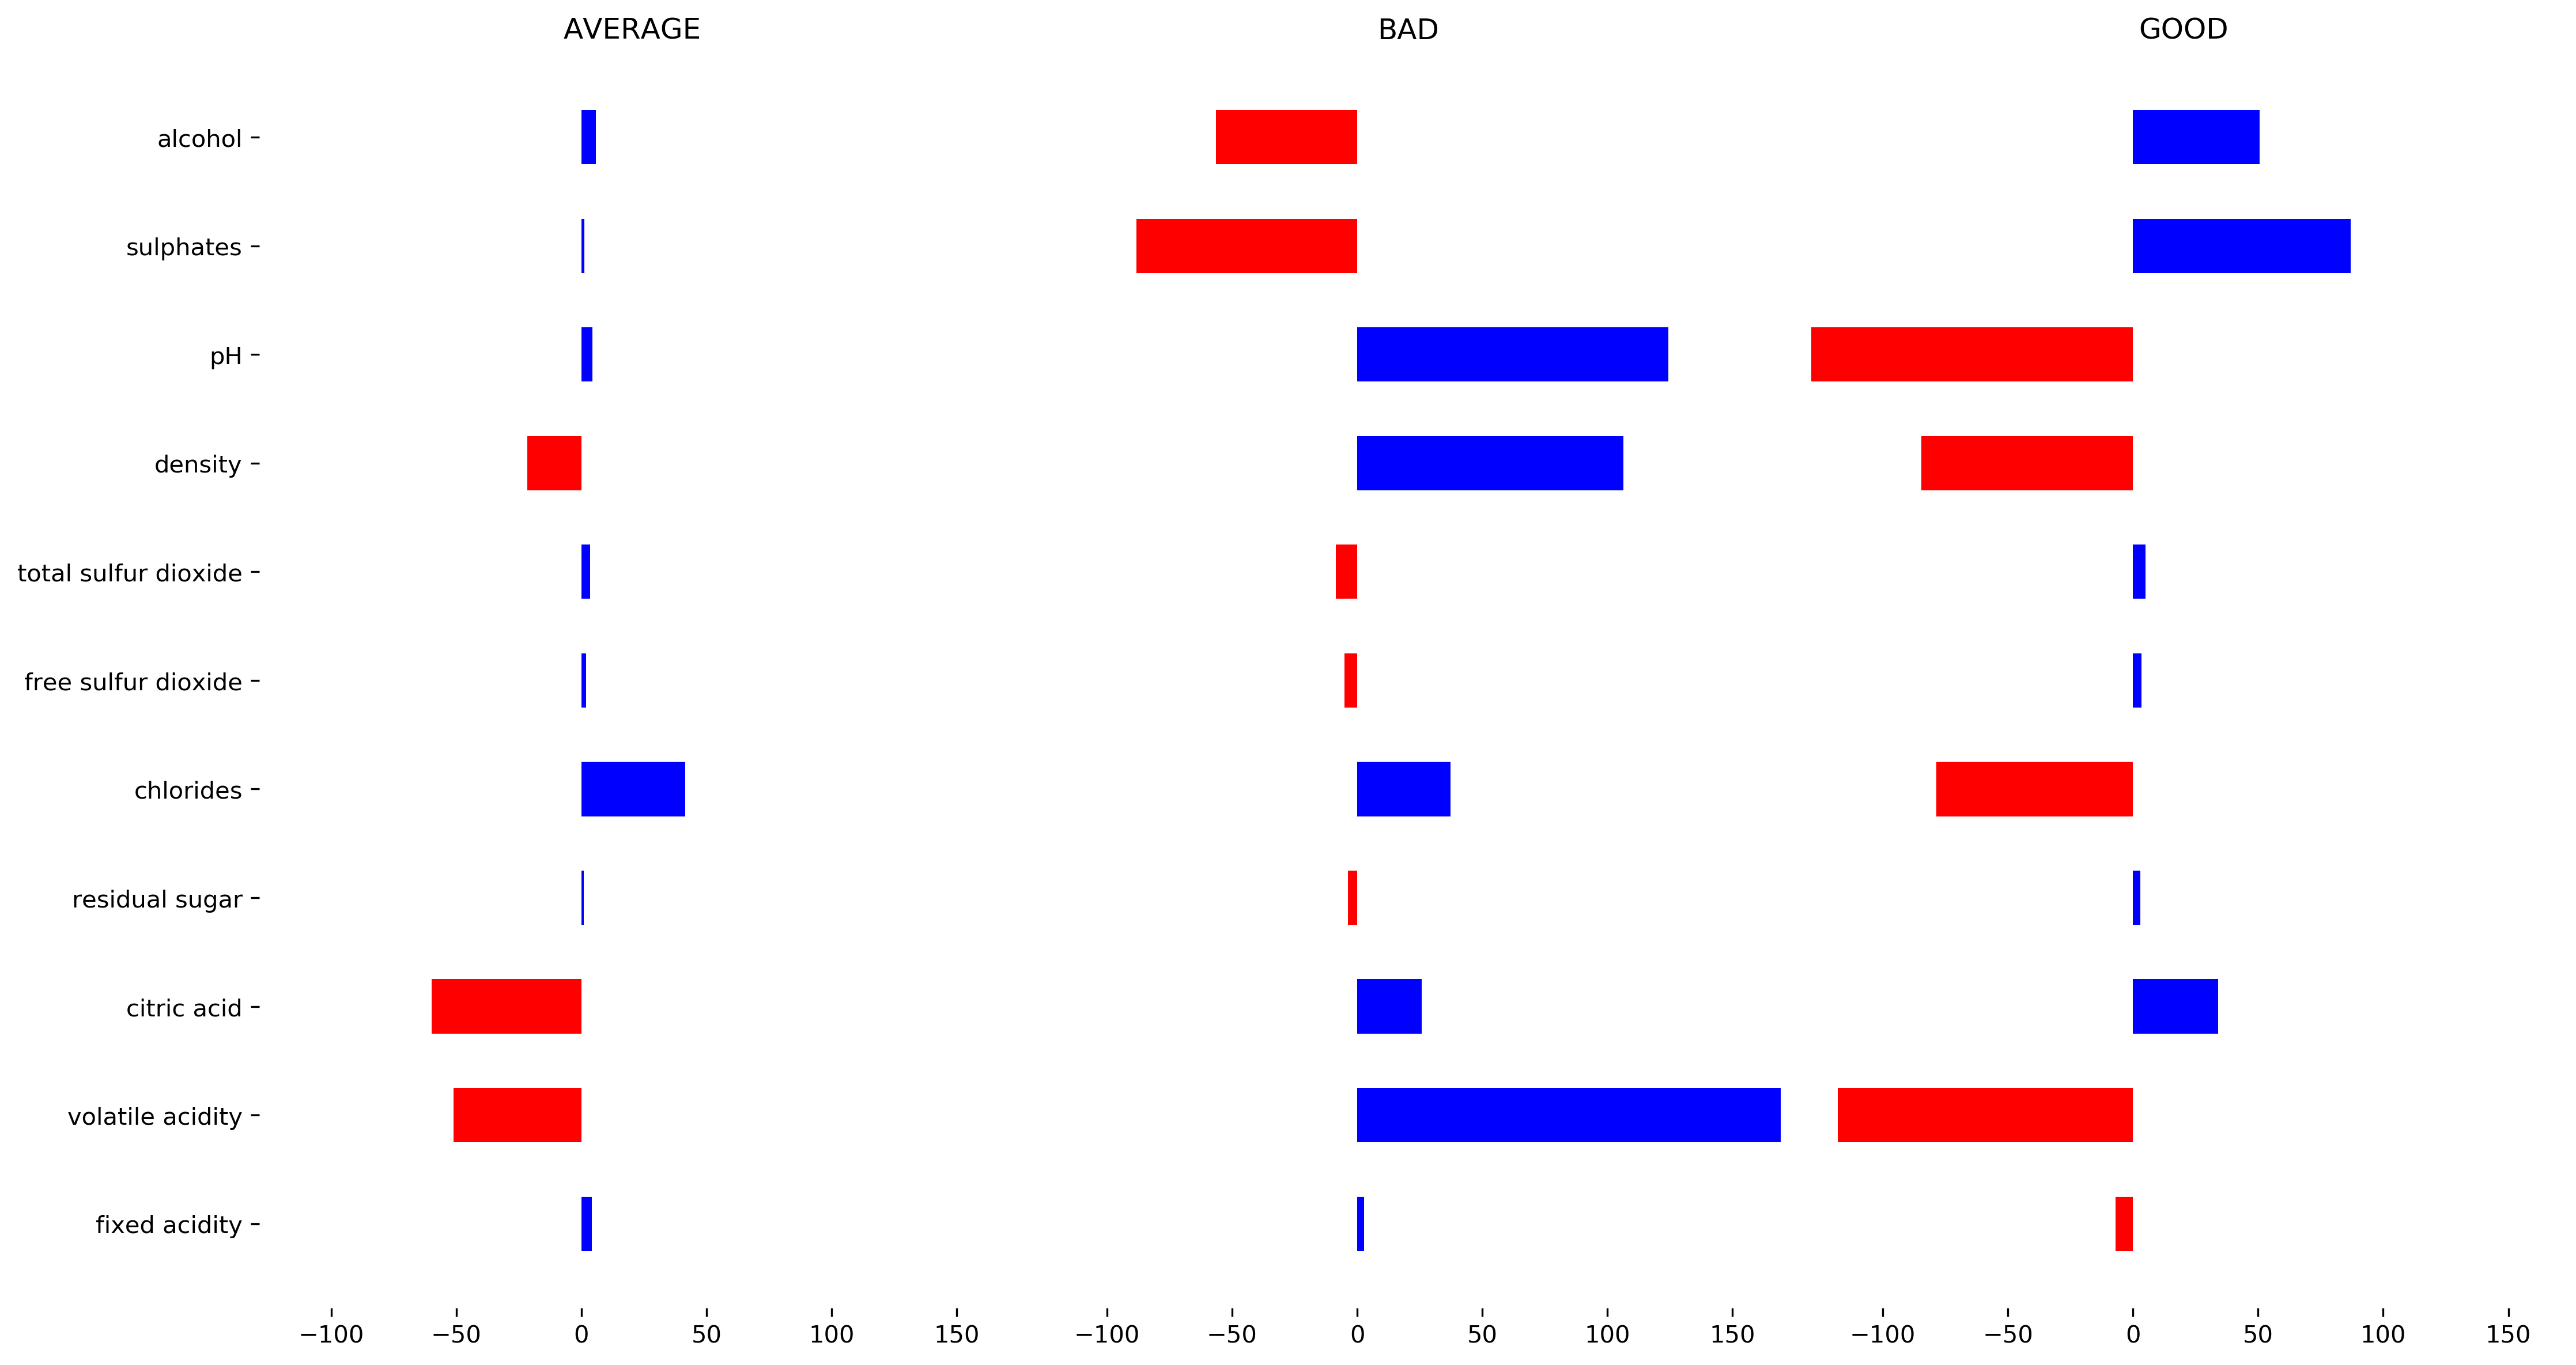

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
for ax, coef, classname in zip(axes, best_model.coef_, Counter(sorted(list(le.inverse_transform(y_train)))).keys()):
    ax.barh(range(len(X.columns)), coef, height=.5, color=plt.cm.bwr_r(np.sign(coef)))
    ax.set_xlim(best_model.coef_.min() - .1, best_model.coef_.max() + .1)

    ax.set_title(classname)
    ax.set_frame_on(False)
    ax.set_yticks(())
    
axes[0].set_yticks(range(len(X.columns)))
axes[0].set_yticklabels(X.columns)
plt.tight_layout()

###### 6.3.1.3 LinearSVC without balancing the class distribution - THIS IS TIME CONSUMING DUE TO CONVERGENCE (5 min)

In [57]:
def grid_search_cv(X, y):
    tuned_parameters = {"C":[0.01, 0.1, 1, 10, 100,1000]}
    clf = LinearSVC(verbose=0, max_iter=100000)
    svc_cv = GridSearchCV(clf, tuned_parameters, cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True))
    svc_cv.fit(X,y)
    return svc_cv.best_params_, svc_cv.best_score_, svc_cv.best_estimator_

In [58]:
best_params, best_score, best_model = grid_search_cv(X_train, y_train)
print('best mean cross-validation score: {:.3f}'.format(best_score))
print('best n_neighbors: {}'.format(best_params))
print('test-set score: {:.3f}'.format(best_model.score(X_test, y_test)))

best mean cross-validation score: 0.683
best n_neighbors: {'C': 1000}
test-set score: 0.692


In [59]:
y_pred = best_model.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('misclassified datapoints: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('accuracy: {:.3f}'.format(accuracy))

misclassified datapoints: 401
accuracy: 0.692


In [60]:
pd.Series(y_pred).value_counts()

0    1003
1     297
dtype: int64

LinearSVC is not able to classify the datapoints to GOOD category (2) since GOOD data points are minority in train dataset.

In [61]:
confusion_matrix(y_test,y_pred)

array([[707, 105,   0],
       [259, 192,   0],
       [ 37,   0,   0]])

The main diagonal gives the correct predictions. That is, the cases where the actual values and the model predictions are the same.

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       812
           1       0.65      0.43      0.51       451
           2       0.00      0.00      0.00        37

   micro avg       0.69      0.69      0.69      1300
   macro avg       0.45      0.43      0.43      1300
weighted avg       0.66      0.69      0.66      1300



- Precision: the ability of classifier not to classify as positive when actually it is negative is zero for GOOD category
- Recall: the ability of classifier to find all positive instances, is also zero for GOOD category.

Therefore, if dont balance the class distribution in dataset, the classifier loses the ability to classify the datapoints to GOOD category.

###### 6.3.1.4 LinearSVC by balancing the class distribution - THIS IS TIME CONSUMING DUE TO CONVERGENCE (22 min)

In [67]:
def grid_search_cv(X, y):
    tuned_parameters = {"C":[0.01, 0.1, 1, 10, 100,1000]}
    clf = LinearSVC(verbose=0, max_iter=1000000, class_weight='balanced')
    svc_cv = GridSearchCV(clf, tuned_parameters, cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True))
    svc_cv.fit(X,y)
    return svc_cv.best_params_, svc_cv.best_score_, svc_cv.best_estimator_

In [ ]:
best_params, best_score, best_model = grid_search_cv(X_train, y_train)
print('best mean cross-validation score: {:.3f}'.format(best_score))
print('best n_neighbors: {}'.format(best_params))
print('test-set score: {:.3f}'.format(best_model.score(X_test, y_test)))

In [69]:
y_pred = best_model.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('misclassified datapoints: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('accuracy: {:.3f}'.format(accuracy))

misclassified datapoints: 408
accuracy: 0.686


In [70]:
pd.Series(y_pred).value_counts()

0    826
1    472
2      2
dtype: int64

LinearSVC is now able to classify the datapoints to GOOD category (2) even though GOOD data points are minority in train dataset.

In [71]:
confusion_matrix(y_test,y_pred)

array([[616, 194,   2],
       [175, 276,   0],
       [ 35,   2,   0]])

The main diagonal gives the correct predictions. That is, the cases where the actual values and the model predictions are the same.

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       812
           1       0.58      0.61      0.60       451
           2       0.00      0.00      0.00        37

   micro avg       0.69      0.69      0.69      1300
   macro avg       0.44      0.46      0.45      1300
weighted avg       0.67      0.69      0.68      1300



- Precision: the ability of classifier not to classify as positive when actually it is negative is still low for GOOD category
- Recall: the ability of classifier to find all positive instances, is very low for GOOD category.

##### 6.4 conclusion

- The KNN performs better in classifying the data points to the right classes as the KNN does not learn anything from data points other than memorizing the train points and assign the class to new test data point based on the closest distance criteria. so, the model is overfitting here.
- Logistic regression predicts the probability of a data point belongs to a certain class given X features. It is nothing but a linear regression on a dependent variable log(odds), odds are calculated as a ratio of the probability of the event divided by the probability of not the event.
    - we lose the predicting power of certain classes if we don't balance the class ditribution
    - we lose the accuracy /f1-score if we balance the class distribution.
- We also need to understand the business requirement to select the right model here.
    - if we need accurancy and easy model then go for KNN, adjust the K value to avoid overfitting.
    - if we need to explain the reason for classification then go logistic regression or support vector classification.
- Next things
    - apply PCA and convert the x features to two dimension
    - then plot the boundary lines to understand the classification visually. 